<a href="https://colab.research.google.com/github/Dileepsingh6432/Cardiovascular-Risk-Prediction-Classification/blob/main/Cardivascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** - Dileep Singh
##### **Team Member 2 -** - Vishal Singh
##### **Team Member 3 -** - Mohammad Irfan

# **Project Summary -**

**This project aims to use data from the ongoing cardiovascular study on residents of Framingham, Massachusetts to predict the 10-year risk of future coronary heart disease (CHD) for patients. The dataset consists of over 4,000 records and 15 attributes, including demographic, behavioral, and medical risk factors. The goal of this project is to develop a predictive model that accurately classifies patients based on their risk of CHD.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Despite advances in medical technology, coronary heart disease remains a leading cause of death worldwide. The early detection of CHD risk is crucial for preventing and mitigating its impact. The current cardiovascular study on the residents of Framingham, Massachusetts provides an opportunity to use data to identify patients at risk of CHD. However, with over 4,000 records and 15 attributes, it is difficult to manually identify patients who are at high risk. This project aims to address this challenge by developing a predictive model that accurately classifies patients based on their risk of CHD. This will help to improve the early detection and prevention of CHD, reducing its impact on patients and the healthcare system.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [199]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})


# Import Libraries

from numpy import math
from numpy import loadtxt
from matplotlib import rcParams

from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
# Load Dataset

filepath ='/content/drive/MyDrive/data_cardiovascular_risk.csv'
df = pd.read_csv(filepath)

### Dataset First View

In [202]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [203]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 3390
The number of columns in data is 17


### Dataset Information

In [204]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [205]:
# Dataset Duplicate Value Count
# df.duplicated().sum()
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [206]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<AxesSubplot:>

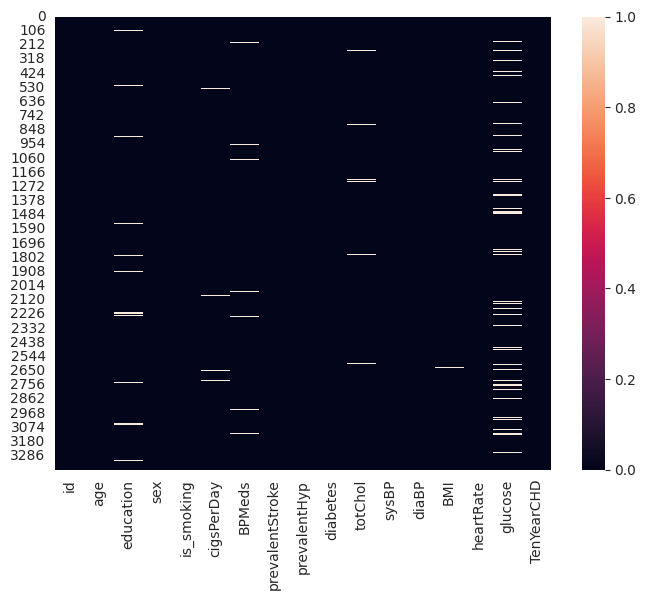

In [207]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

This dataset contains many features which has null values. As we see, there are lots of null values in 'glucose' column. The features 'education', 'cigsPerDay', 'BPMeds', and 'totChol' also has missing values.

## ***2. Understanding Your Variables***

In [208]:
# Dataset Columns
print(list(df.columns))

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [209]:
# Dataset Describe
df.describe()


id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

**Demographic**
* Sex: male or female("M" or "F")

* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [210]:
# Check Unique Values for each variable.

for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in id are [   0    1    2 ... 3387 3388 3389]
The unique values in age are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
The unique values in education are [ 2.  4.  1.  3. nan]
The unique values in sex are ['F' 'M']
The unique values in is_smoking are ['YES' 'NO']
The unique values in cigsPerDay are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
The unique values in BPMeds are [ 0. nan  1.]
The unique values in prevalentStroke are [0 1]
The unique values in prevalentHyp are [0 1]
The unique values in diabetes are [0 1]
The unique values in totChol are [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 19

## 3. ***Data Wrangling***

### Data Wrangling Code

In [211]:
# Write your code to make your dataset analysis ready.

In [212]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [213]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### What all manipulations have you done and insights you found?

From the above table, it is clear that our data is ready to analyse. And ofcourse, there are null values in the data and categorical column in the data. So, we can treat null values, and convert the categorical features into numerical columns, and we wiil do this in feature engineering. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Countplot of Each Categorical Columns (Univariate)

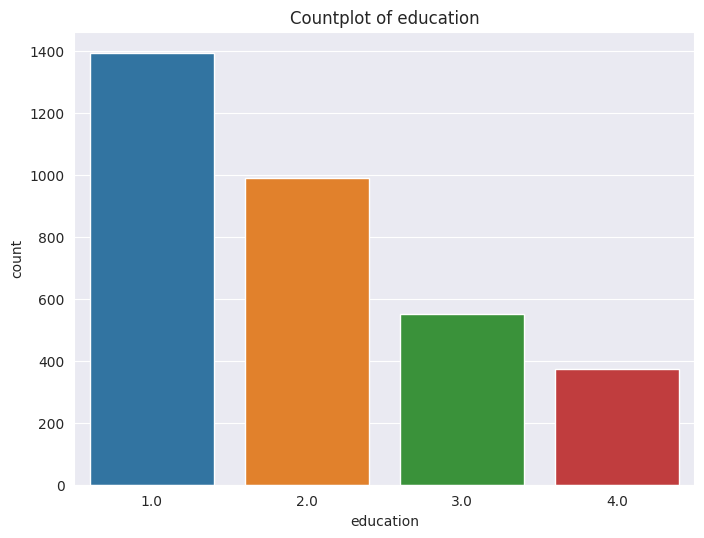

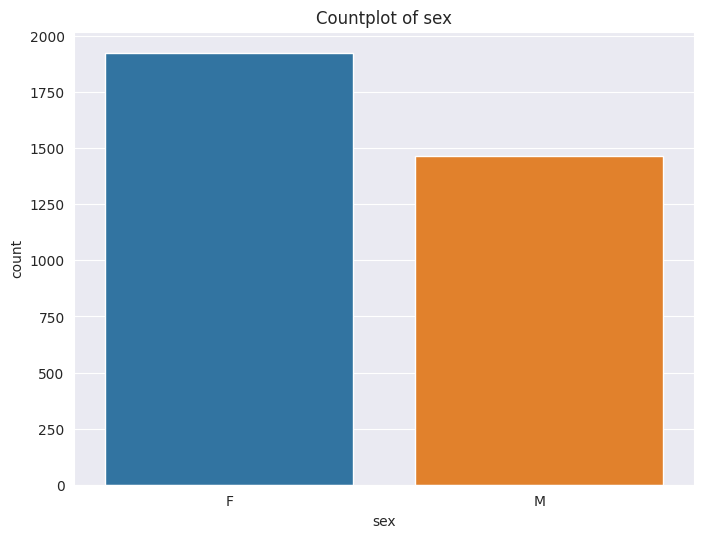

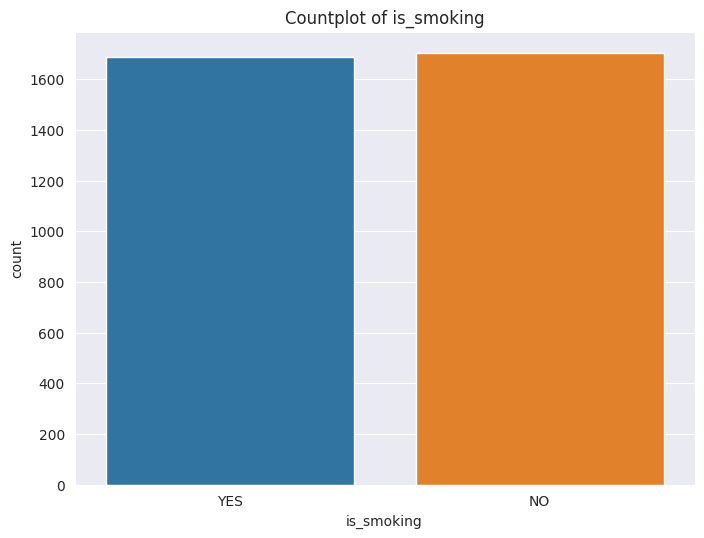

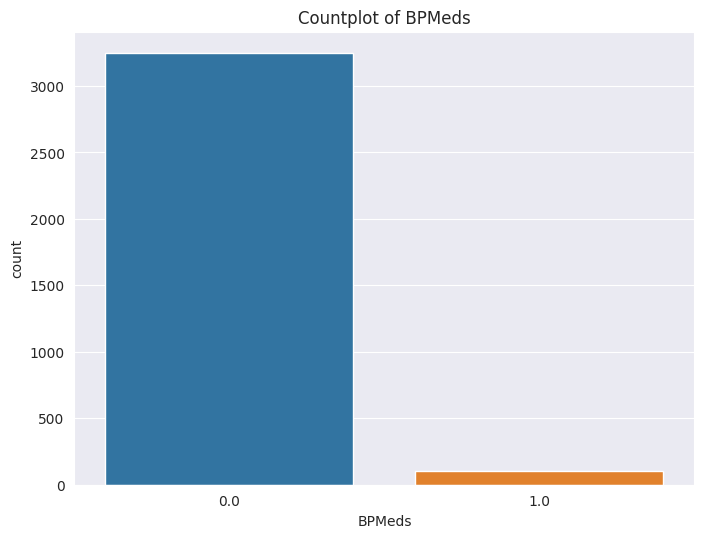

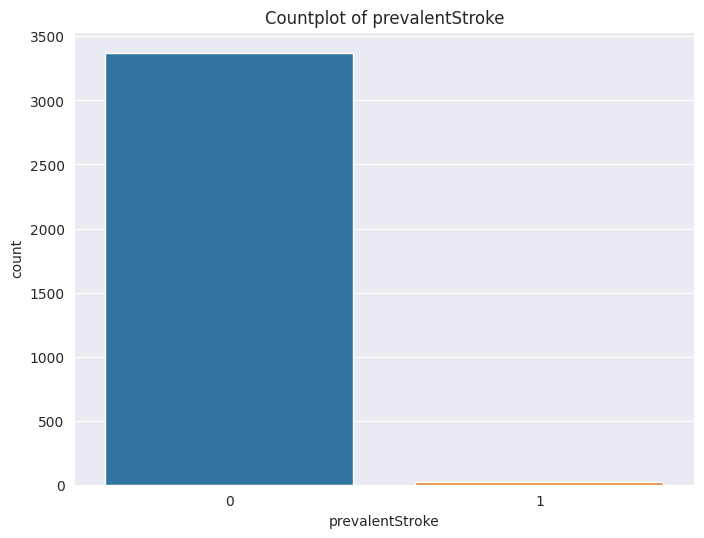

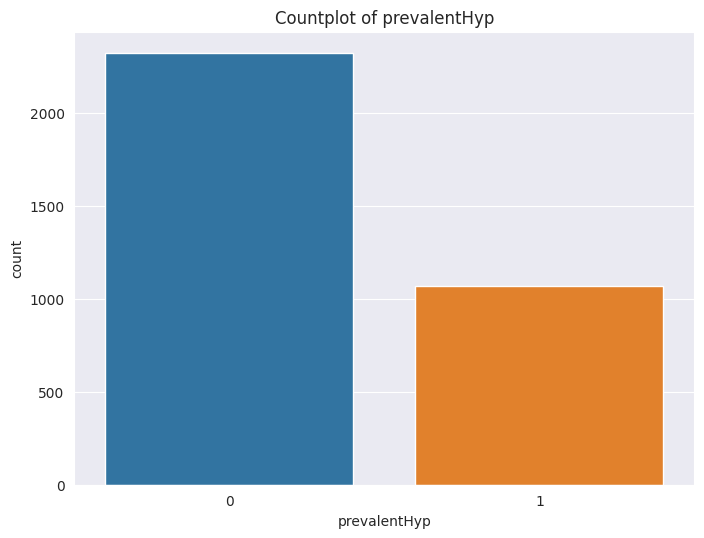

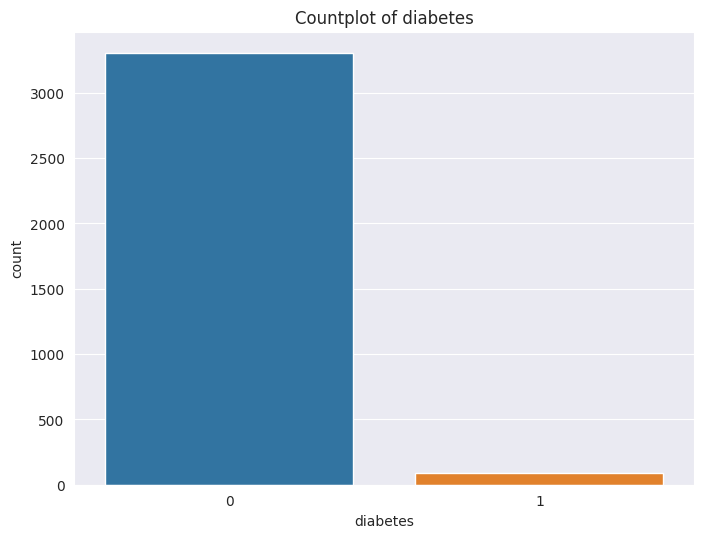

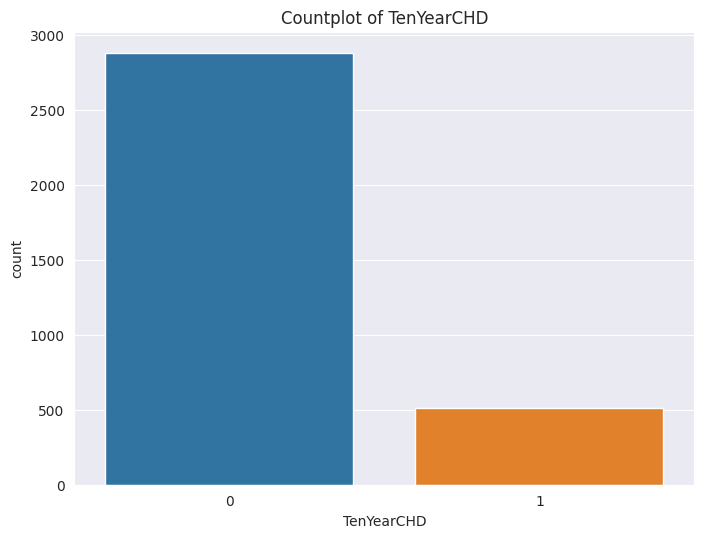

In [214]:
# Chart - 1 visualization code
for col in df.columns:
  if col in ['is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.countplot(x=df[col])
    ax.set_title(f'Countplot of {col}')

##### 1. Why did you pick the specific chart?

The countplot represents the count of each category present in the dataset. So, we choose this chart to check the occurance of each category in any categorical feature.

##### 2. What is/are the insight(s) found from the chart?

The following points we noticed about each categorical column.
* There are four category of education (i.e. 1, 2, 3, and 4). And majority of the people have level 1 education followed by level 2, and least in level 4.
* The number of females is more than males.
* The number of people smoking is equal to the number of people who don't smoke.

* A few number of people take BP meds.
* A negligible number of people have prevalanet stroke.
* Approximately 1000 people have prevalent hypertension.
* A large portion of people haven't got diabetes but few have diabetes.
* Approximately 500 people have TenYearCHD, and around 2900 people haven't.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above countplot gives us a lot of information about the pervalent hypertension, prevalanet stroke, diabetes, etc.
This will definitely help the healthcare induries to draw useful insights from the above plot. 

#### Chart - 2 Hist Plot for Each Continuous Variables (Univariate)

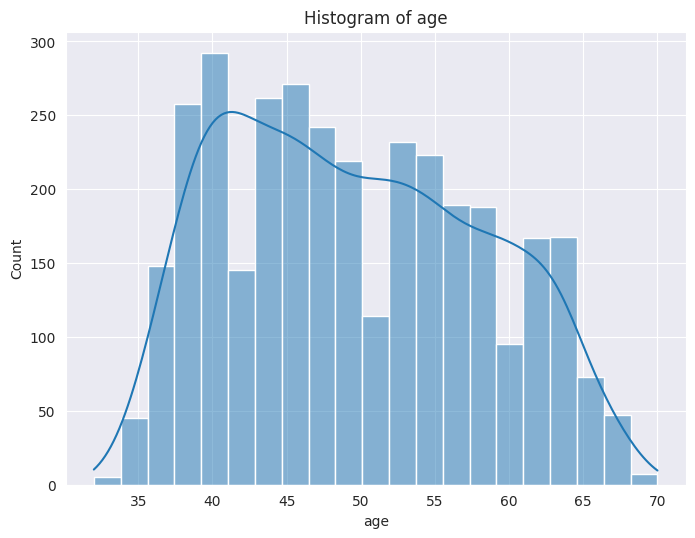

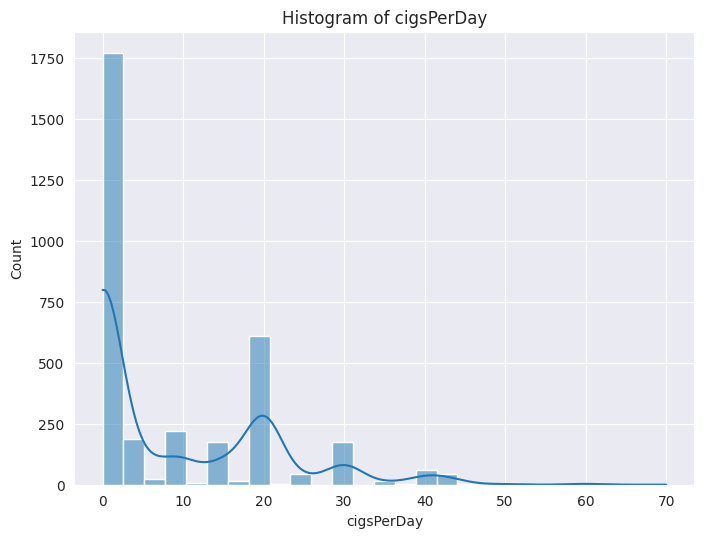

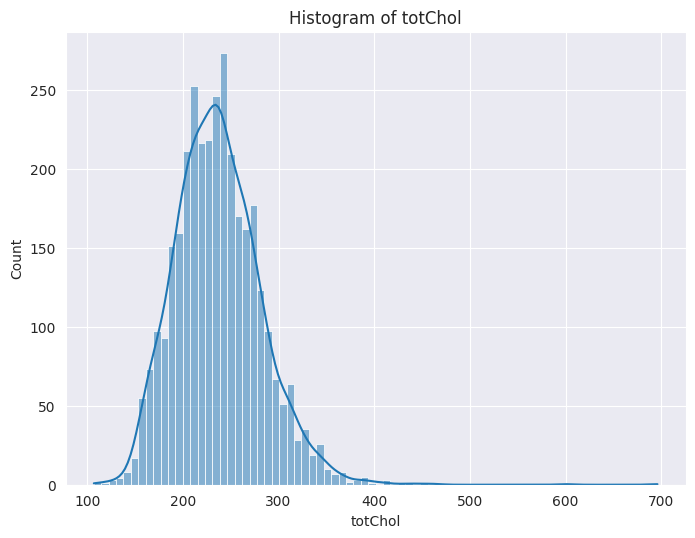

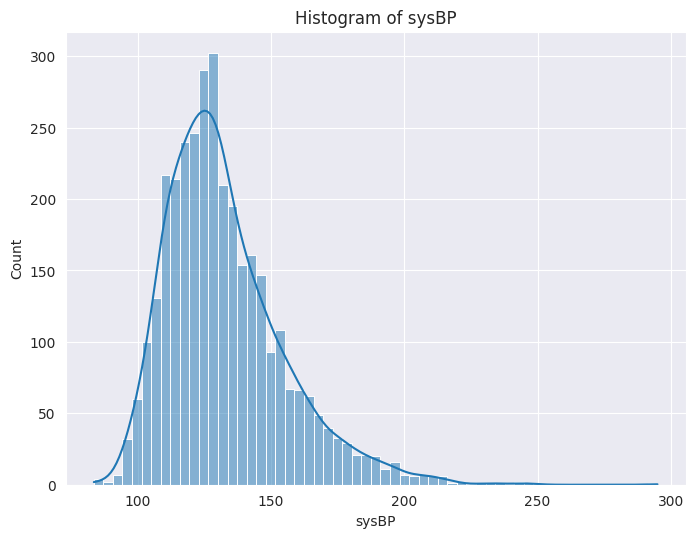

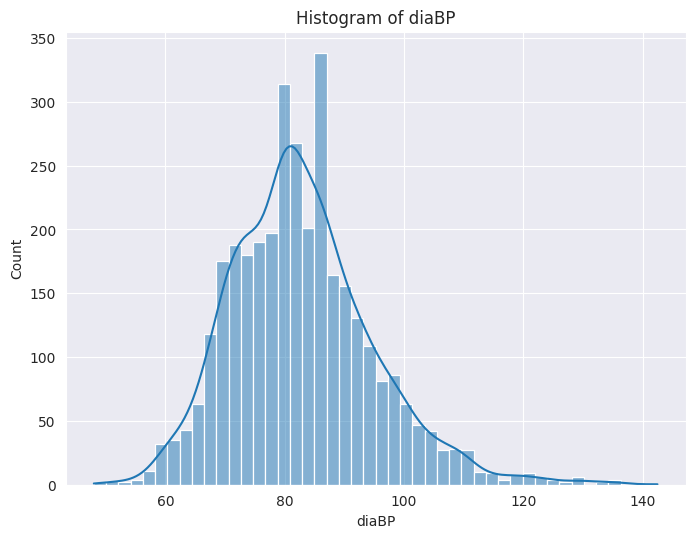

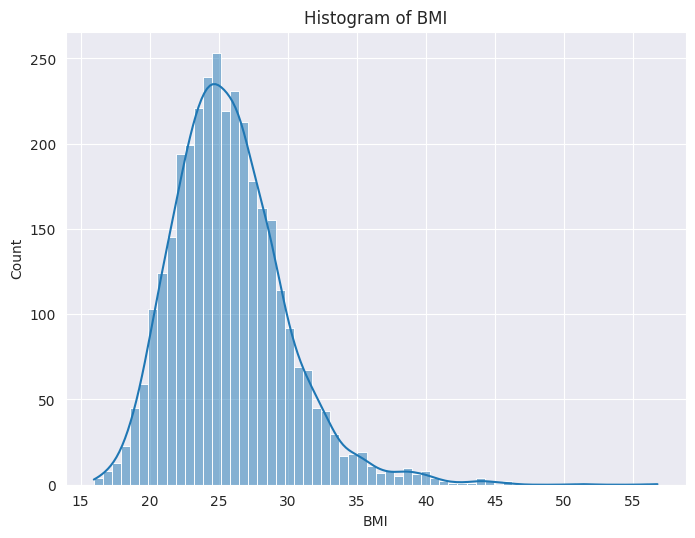

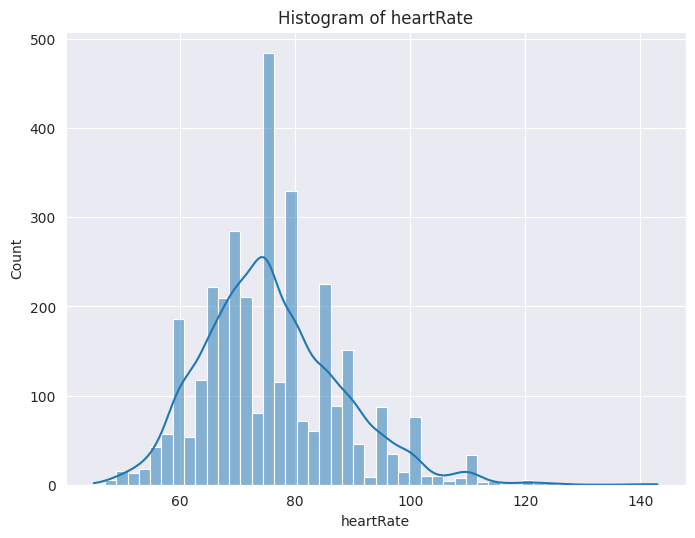

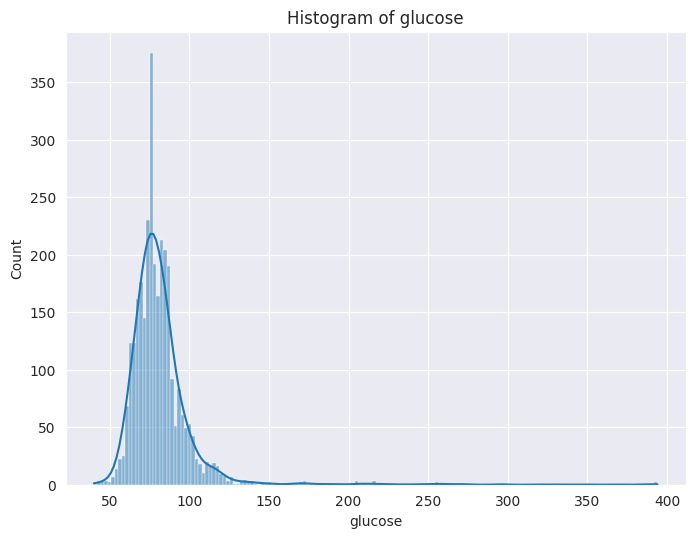

In [215]:
# Chart - 2 visualization code

# Check the distribution of each numerical columns using histogram
for col in df.describe().columns.to_list():
  if col not in ['id', 'is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.histplot(x=df[col], kde=True)
    ax.set_title(f'Histogram of {col}')


##### 1. Why did you pick the specific chart?

The histogram are used to find the outliers in the data, check the distribution, skewness, etc. of any continuous variable present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following insights we gained from the above plot.
* The maximum people lies between the age 37 and 55 years in the available dataset.
* Most people (approx 1750) don't smoke, and 20 cigs per day is consumed by approximately 625 people.
* Total cholestrol follows a normal distribution except there are some outliers in the data.
* Systolic BP follows an approximetly normal distribution. It has some outliers, and it shows a positive skewness (very little). 
* The diastolic BP denotes a bell curve except when diaBP is around 80.
* BMI column shows a normal distribution but it has a few outliers.
* Most people's heart rate lies between 60 and 90.
* Glucose has lot of outliers in the right so, it is a positively skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insights helps in modeling. These insights will help us in data transformation, scaling the data, etc.
From this chart, we get a lot of insights about the numerical columns, and it will lead to a good business impact (to detect the CHD at earliest).

#### Chart - 3 Barplot between Heart Rate and TenYearCHD (Bivariate)

Text(0.5, 1.0, 'bar chart between the heartRate and TenYeaeCHD')

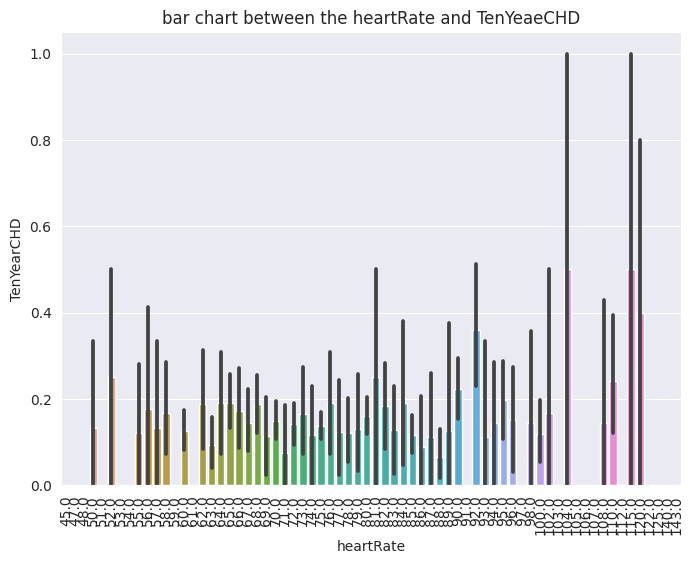

In [216]:
# Chart - 3 visualization code
# Writing code for ploting bar chart between the heartRate and TenYeaeCHD
ax=plt.gca()
plt.rcParams.update({'figure.figsize':(14,10),'figure.dpi':100})
sns.barplot(x=df['heartRate'],y=df['TenYearCHD'])
plt.xticks(rotation=90)
ax.set_title('bar chart between the heartRate and TenYeaeCHD')


##### 1. Why did you pick the specific chart?

A bar plot is used to display and compare the distribution of categorical data. The length of bar shows the magnitude of each categorical feature in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar plot shows the relative frequency (for TenYearCHD) is greater if the heart rate is 104, 115, and 120.
So, it indicates that the probability of geting CHD is high if the heart rate is 104, 115, or 120. In general, there is no gradual increase in TenYearCHD with increasing heart rate.  Means no clear correlation between the heart rate and TenYearCHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This bar chart helps us to conclude a relationship between the TenYearCHD and heart rate. And it helps the healthcare industries while predicting whether a person will get a CHD or not.

#### Chart - 4 Pie Chart of Showing Proportions of Euducation Level (Univaraite)

Text(0.5, 1.0, 'Percentage of Education Levels')

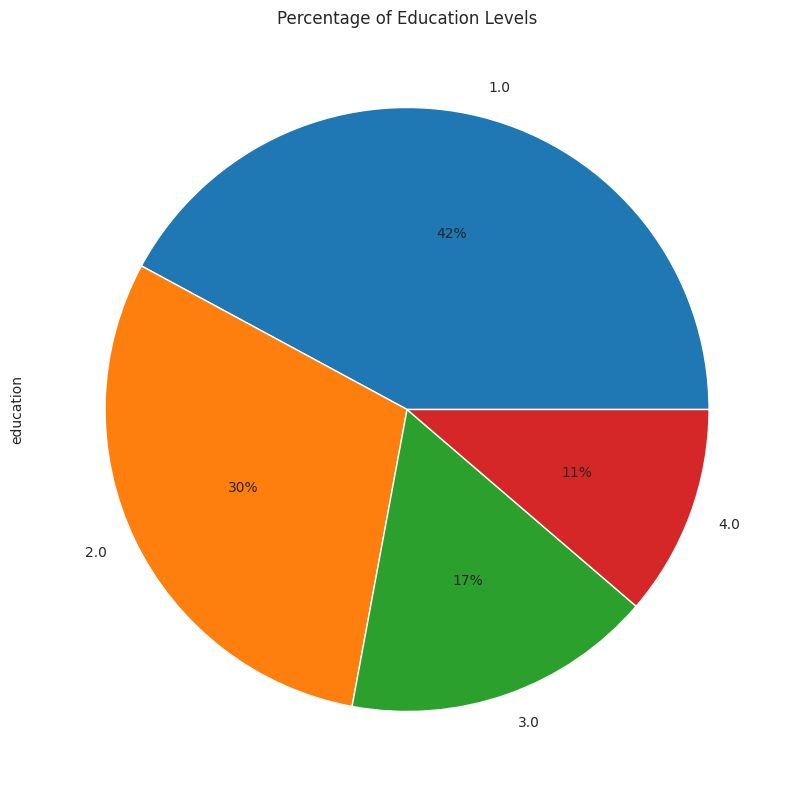

In [217]:
# Chart - 4 visualization code

# Define the value counts in Education
education=df['education'].value_counts()

# Define the plot in percentage
education.plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage of Education Levels')

##### 1. Why did you pick the specific chart?

A pie chart depicts the percentage of a quanity in a particular category. This chart shows the proportions of education level present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following insights are extracted from the above pie chart.
* 42% people have education level 1.
* 30% people have education level 2.
* 17% people have education level 3.
* 11% people have education level 4.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information only tells us about the proportion of people present in our dataset. This varaible is generaly doesn't causes much effect on our target variable (TenYearCHD).

#### Chart - 5 Bar Plot between Age and TenYearCHD (Bivariate)

<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

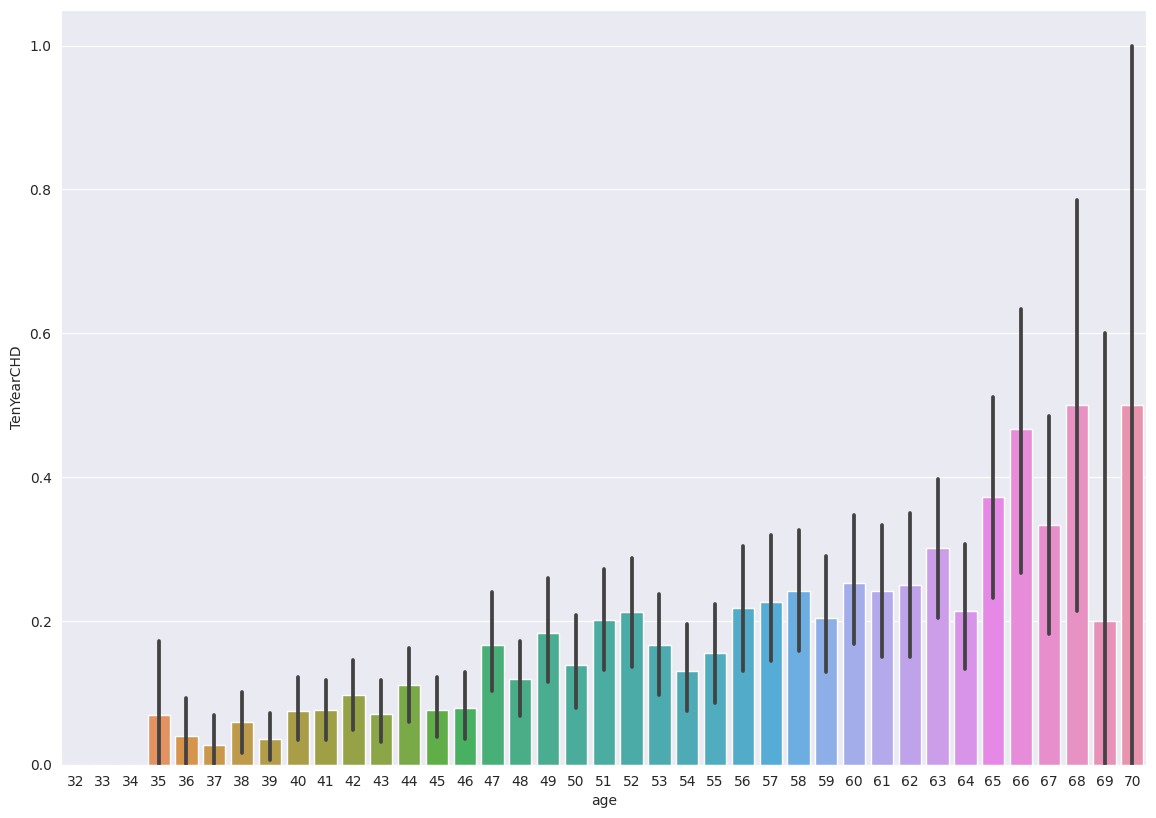

In [218]:
# Chart - 5 visualization code

# Writing a code to find a relationship between the age and TenYearCHD
sns.barplot(x=df['age'],y=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

A bar plot is used to find the relative frequency of a categorical variable. The bar plot shows the probability (relative frequency) of getting CHD with increasing the age.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clear that the relative frequency is increasing with increasing the age.
So, the chances of getting CHD is high if the age is high. So, the TenYearCHD is proportional to age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights will definitely help the positive business impact for a healthcare industry. So, while using a ML model, this feature (age) will play a crucial role while predicting whether a person will get CHD or not.

#### Chart - 6 Bar Plot between each categorical variable and the target variable (Bivariate)

In [219]:
cols=list(set(df.columns)-set(['id', 'age', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','cigsPerDay', 'TenYearCHD']))
cols

['diabetes',
 'prevalentHyp',
 'is_smoking',
 'education',
 'sex',
 'BPMeds',
 'prevalentStroke']

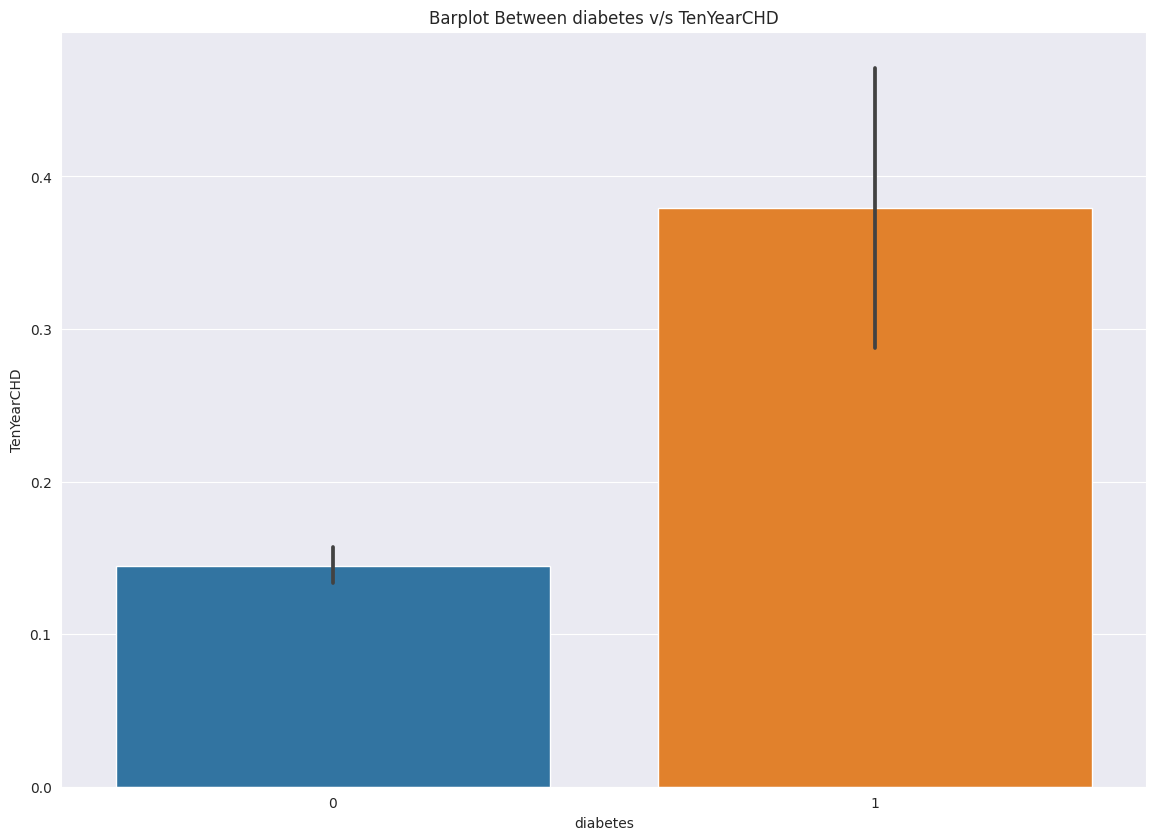

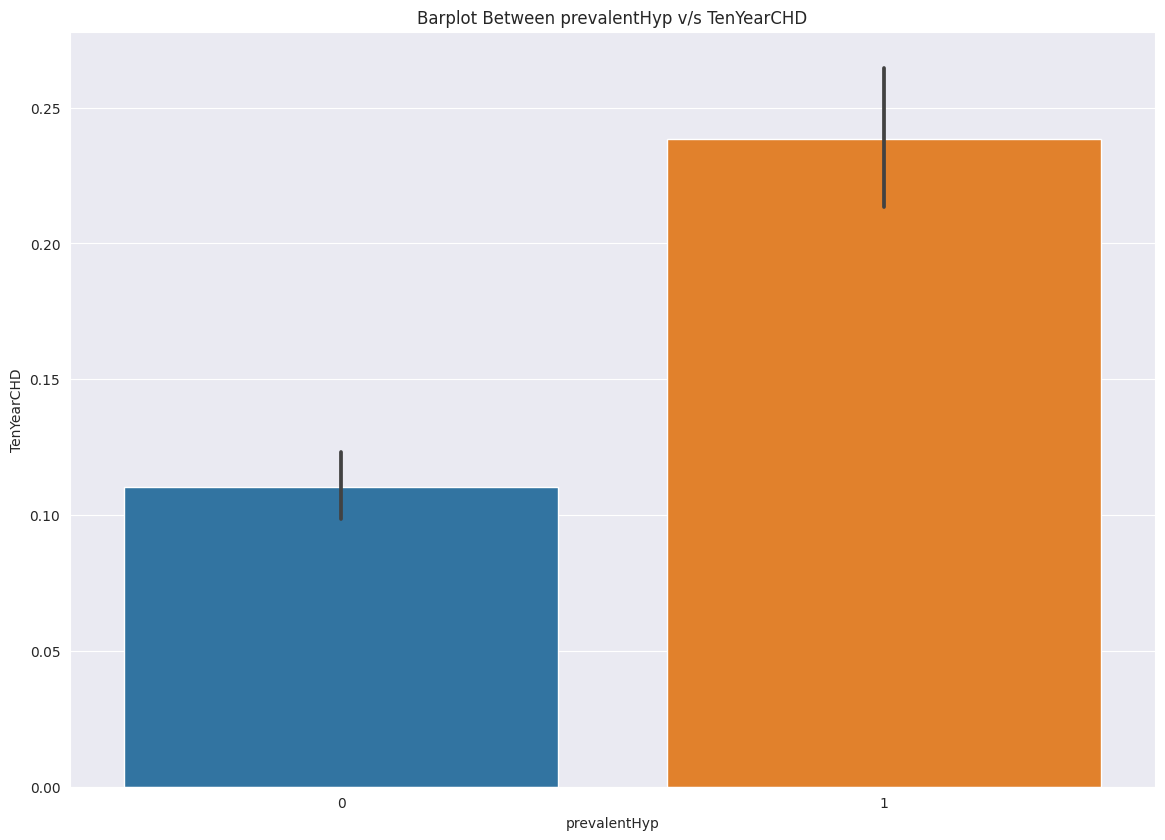

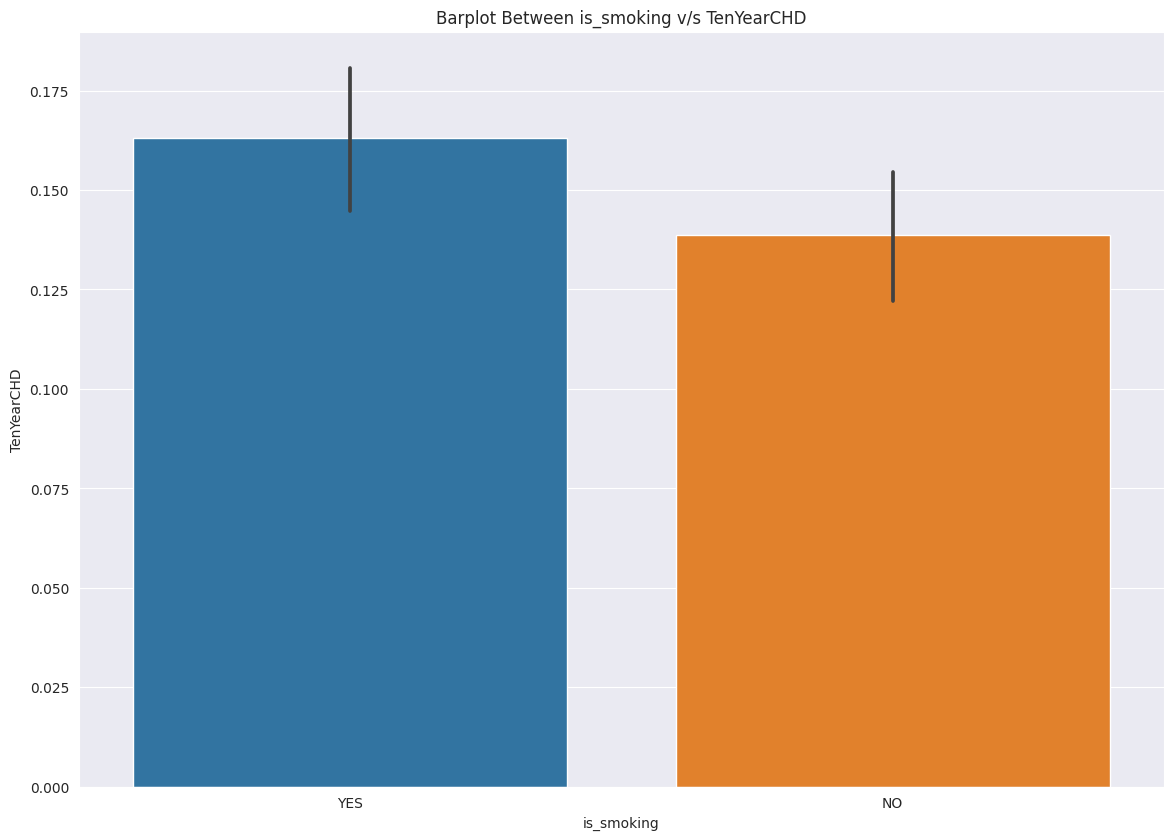

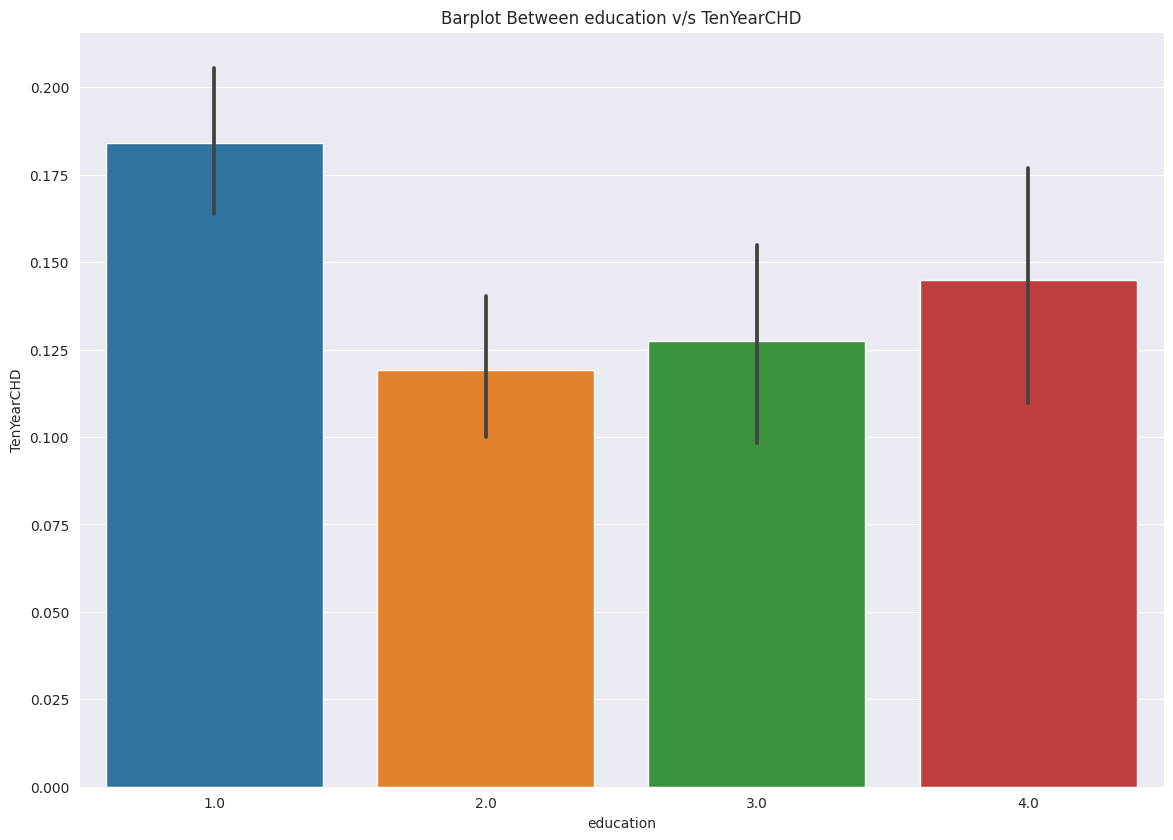

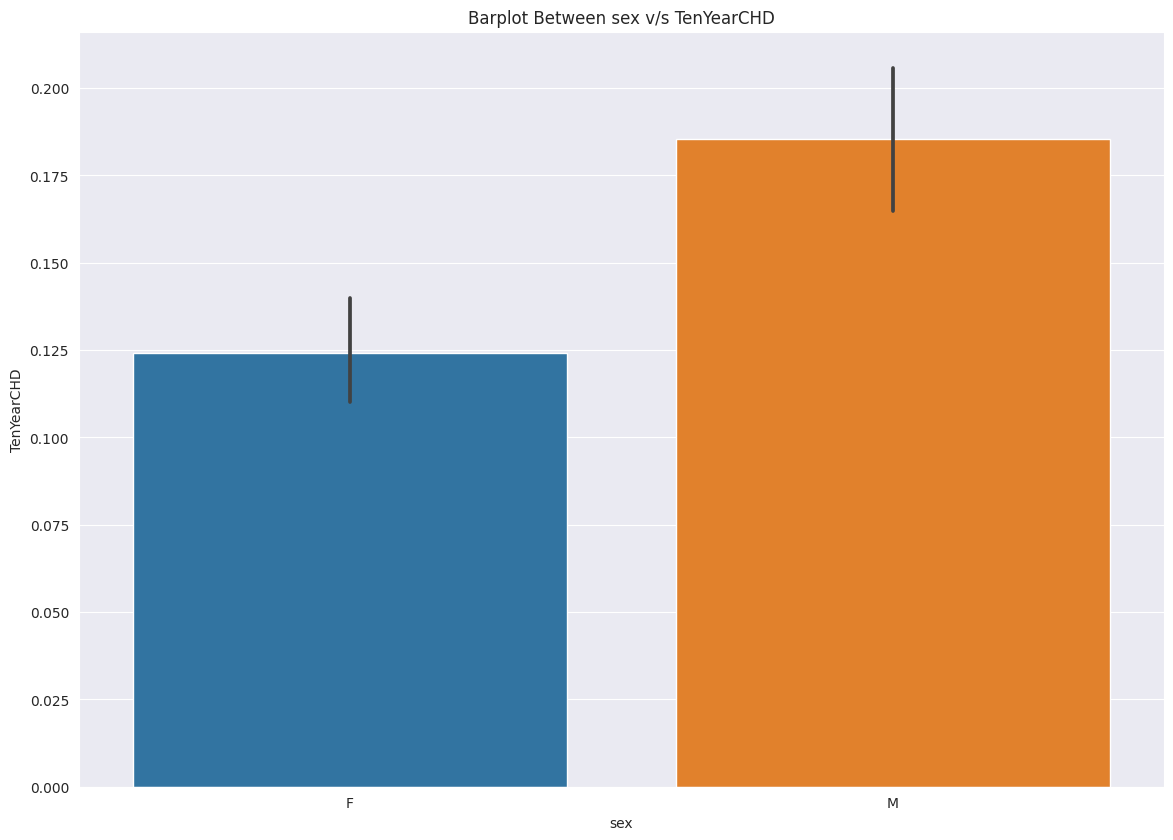

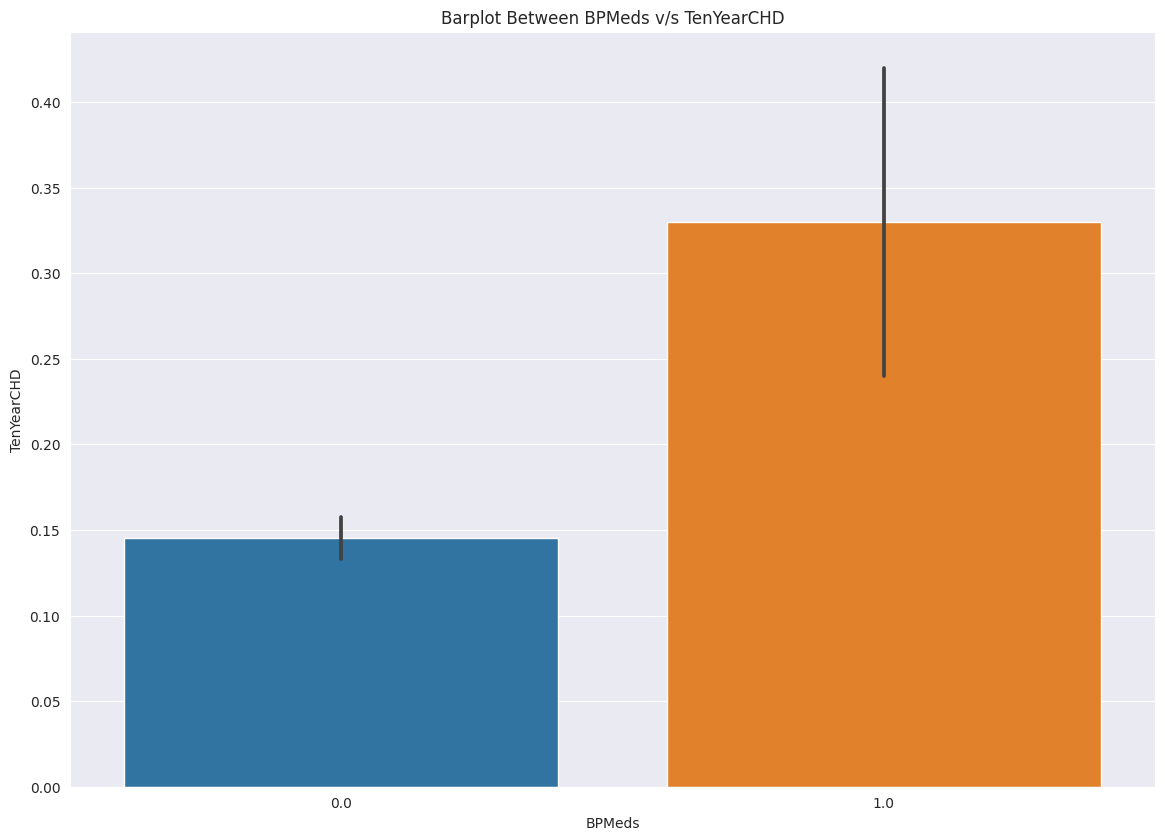

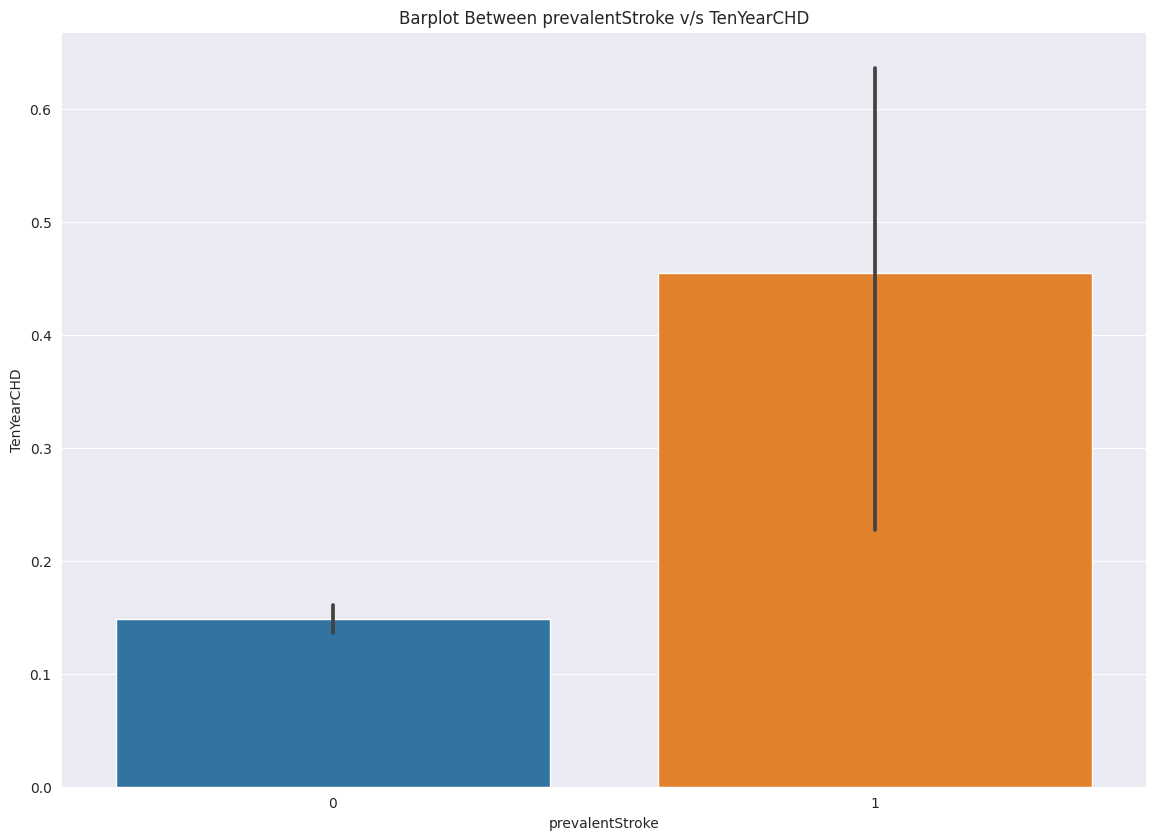

In [220]:
# Chart - 6 visualization code

# Bar plot between categorical column (containing two or four values) and the target variable

for col in cols:                                                                           
    plt.subplots(1,1)       # Here, subplot depect one row and one column 
    ax=sns.barplot(df[col],y=df['TenYearCHD'])                                                                      
    ax.set_title(f'Barplot Between {col} v/s TenYearCHD')     # Set title for each graph
    # Add text labels to the barplot


##### 1. Why did you pick the specific chart?

To find a bar plot between the target variable and each categorical column.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained using the above plots.
* Chances of getting CHD is more if they have diabetes.

* People having education level 1 are prone to getting CHD followed by level 4, and least of level 2.

* The probability of getting CHD is more in males.

* The people who are taking BP meds are at high risk of getting CHD.

* People have high probability of getting CHD who had earlier prevalent stroke.
* People have high probability of getting CHD who had earlier prevalent hypertension.

* The probability of getting CHD is more in people who smoke compared to the people who don't.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 7 Violin Plot between TenYearCHD and BMI (Bivariate)

Text(0, 0.5, 'Body Mass Index')

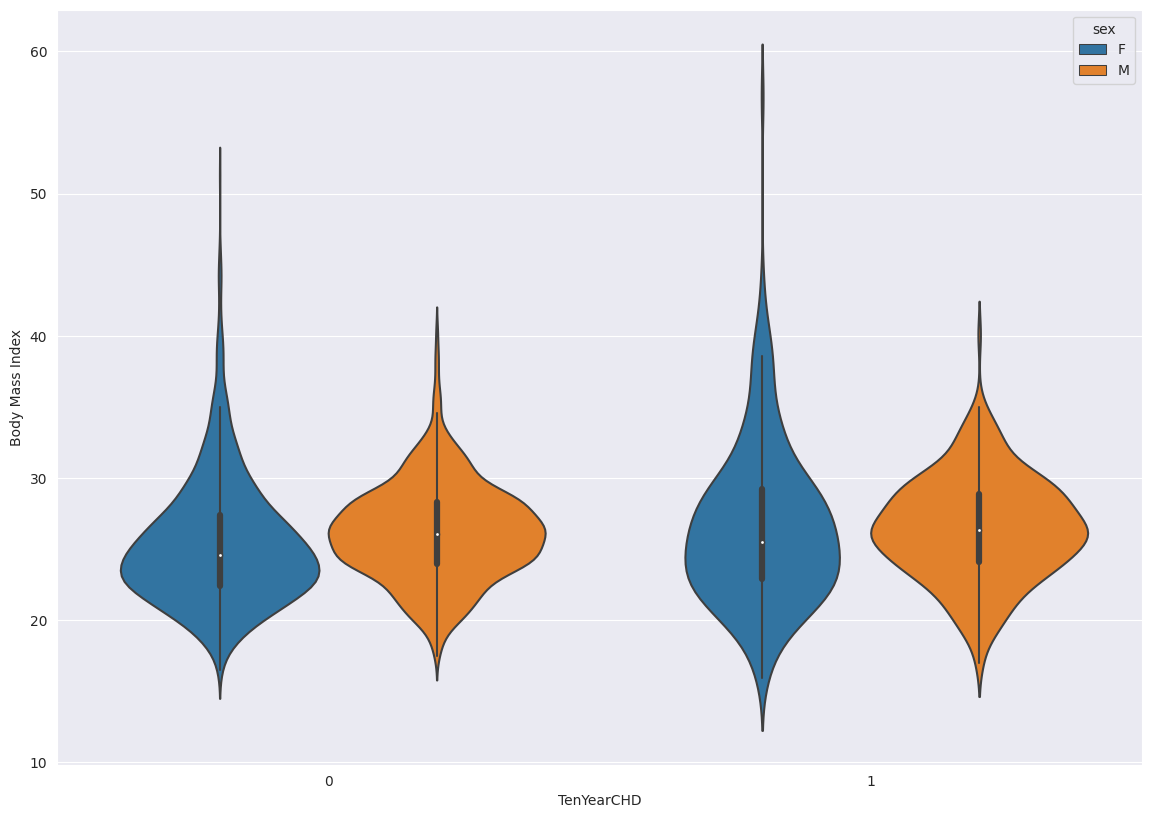

In [221]:
# Chart - 7 visualization code
ax = plt.gca()
sns.violinplot(x='TenYearCHD', y='BMI', hue='sex', data=df)
ax.set_xlabel("TenYearCHD")
ax.set_ylabel("Body Mass Index")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Scatter Plot between the age and BMI considering sex column (Multivariate)

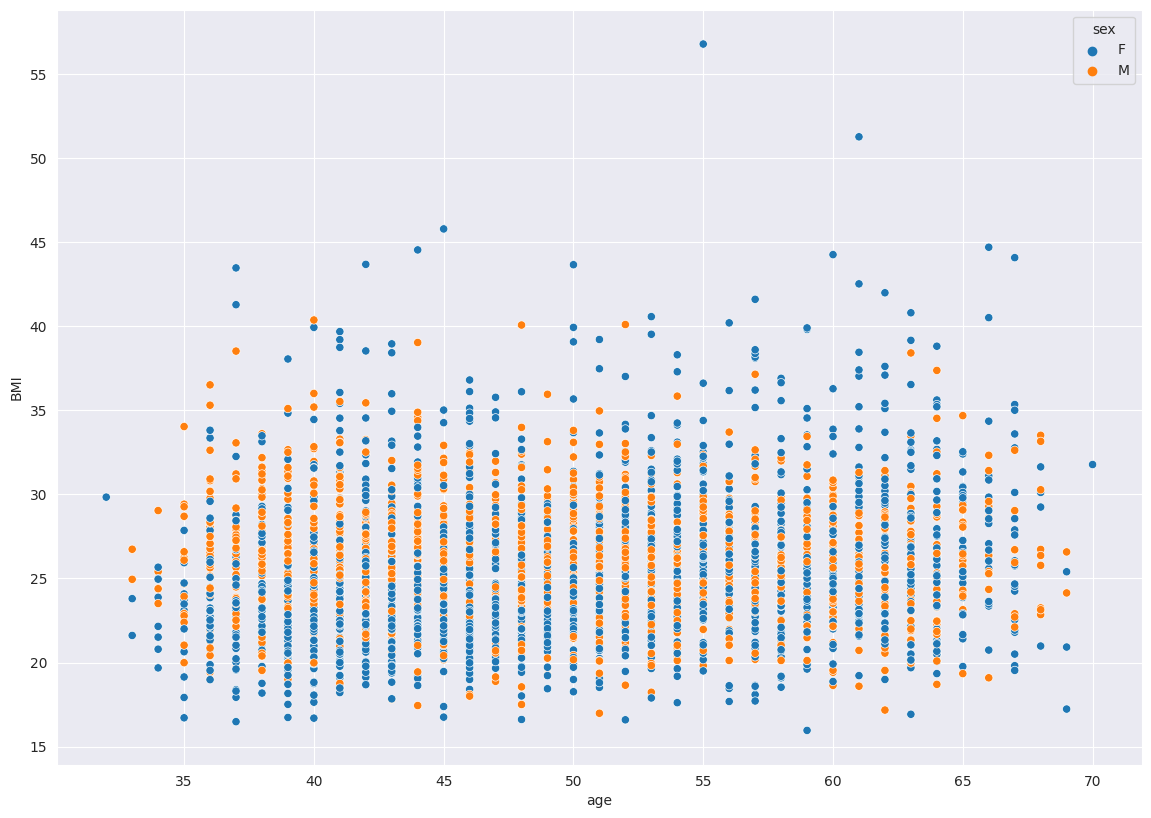

In [222]:
# Chart - 8 visualization code
# Writing a code to draw a scatterplot that depicts the relation between the age and BMI
sns.scatterplot(x=df['age'], y=df['BMI'], hue=df['sex'])
plt.show()

##### 1. Why did you pick the specific chart?

We use the chart to find the relationship between the age and BMI columns.

##### 2. What is/are the insight(s) found from the chart?

There is no correlation between the age and BMI. We are not seeing any positive or negative trend seen in the BMI with increasing the age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we see earlier, that the risk of getting heart disease is high with increasing the age. We are seeing that there is no correlation between the age and BMI so, this information will neither lead to positive or negative impact on the predicting TenYearCHD.

#### Chart - 9 Bar Plot between the Cigarates per day and TenYearCHD considering Sex (Multivariate)

Text(0.5, 1.0, 'Bar Plot between the Cigarates per day and TenYearCHD considering Sex')

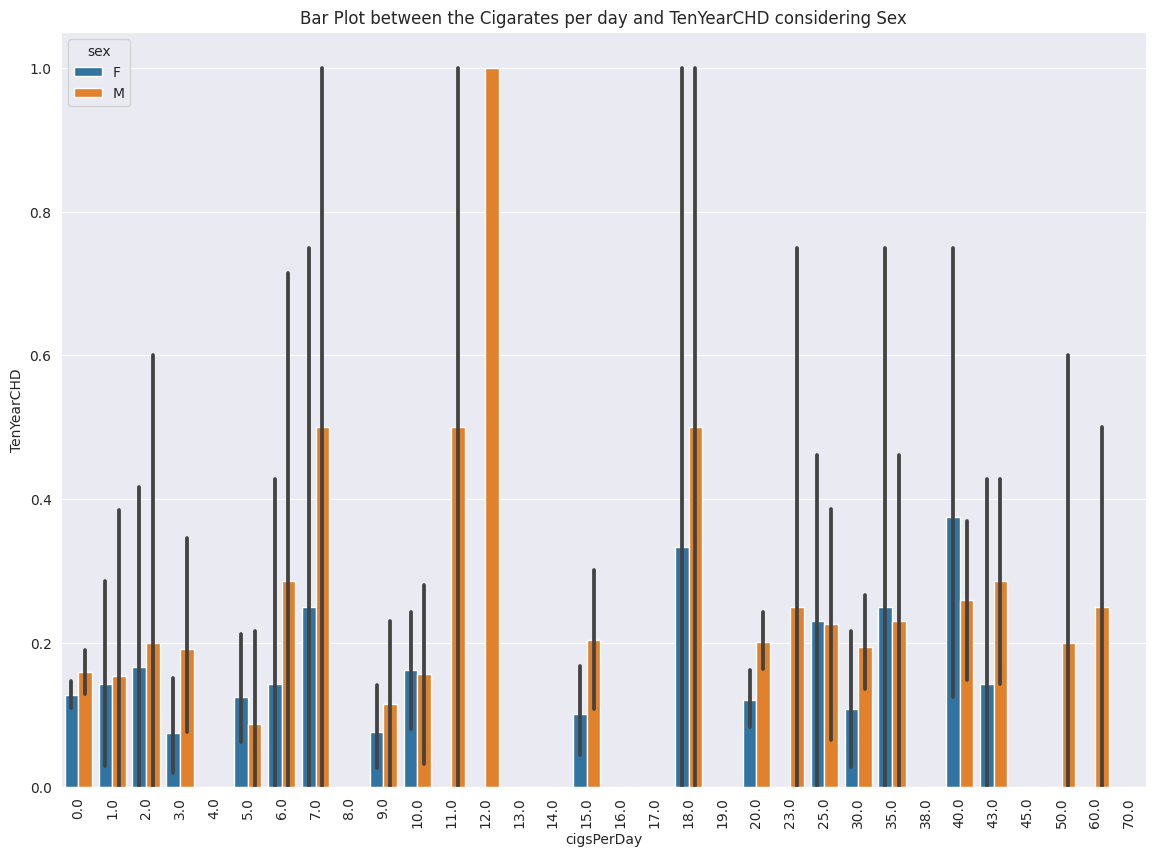

In [223]:
# Chart - 9 visualization code
ax=plt.gca()
sns.barplot(x=df['cigsPerDay'],y=df['TenYearCHD'],hue=df['sex'])
plt.xticks(rotation=90)
ax.set_title('Bar Plot between the Cigarates per day and TenYearCHD considering Sex')

##### 1. Why did you pick the specific chart?

To know about the probability of getting CHD corressponding to the number of cigarates consumed per day (on the basis of sex).

##### 2. What is/are the insight(s) found from the chart?

As we see from the plot, the probability of getting CHD is high if cigsPerDay is 11 or 12. And it is less probable if cigsPerDay is 60 or 70. So, it does not gives the clear relationship between the cigsPerDay and getting CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights is not so useful to predict CHD on the basis of cigsPerDay (Cigarettes per day).

#### Chart - 10 Boxplots of All Numerical Features 

In [224]:
df.describe().columns # Find the numerical features

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Text(0.5, 0, 'Numerical Features')

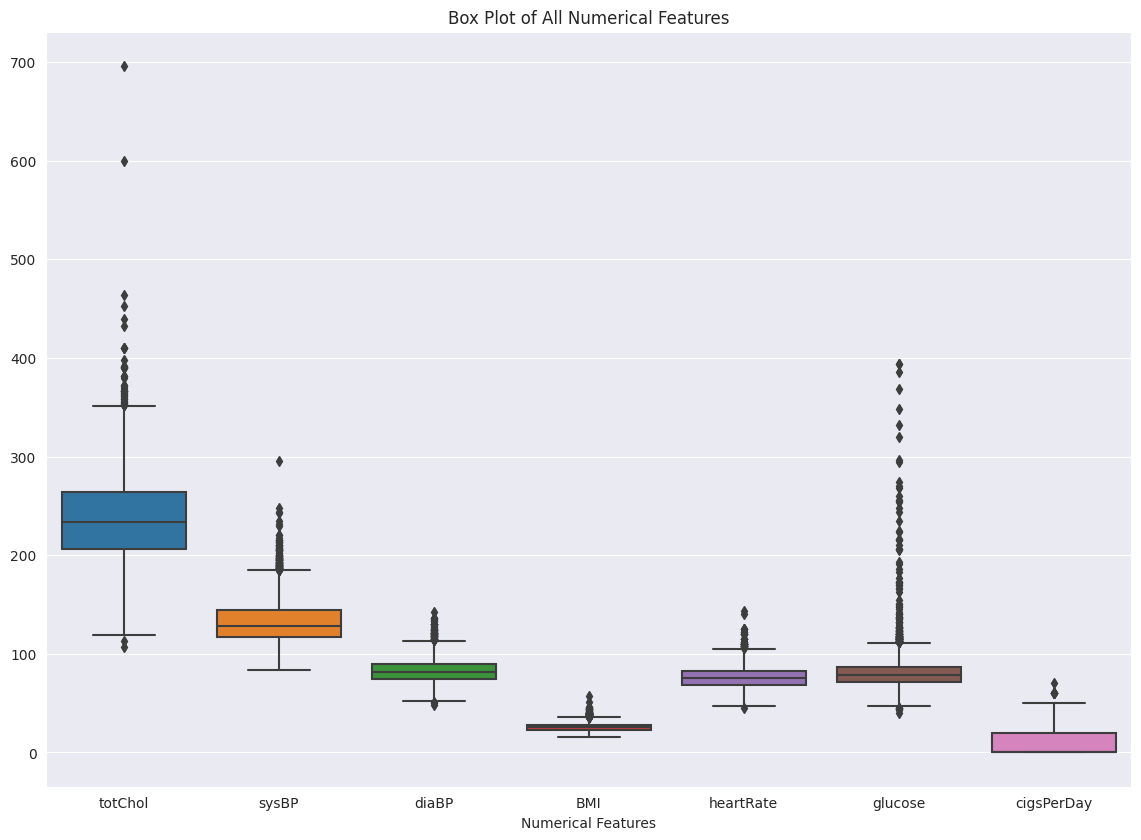

In [225]:
# Chart - 10 visualization code

#Select the dataset containing numerical features in the dataset
cols_for_boxplot=df[['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']]

# Create the box plot
sns.boxplot(data=cols_for_boxplot)

# Add a title to the plot
plt.title('Box Plot of All Numerical Features')
plt.xlabel('Numerical Features')


##### 1. Why did you pick the specific chart?

The box plot is used to check the outliers in the dataset. So, we picked the above chart to find the outliers in the numerical features. 

##### 2. What is/are the insight(s) found from the chart?

From the boxplot, it is clear that glucose has highest number of outliers followed by totChol (total cholestrol) and sysBP (Systolic BP).

The highest least number of outliers is present in cigsPerDay (cigarettes per day).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight from the above plot can be used to treat the outliers. 

#### Chart - 11  Bubble Chart using Age, Heart Rate, and Total Cholestrol (Multivariate)

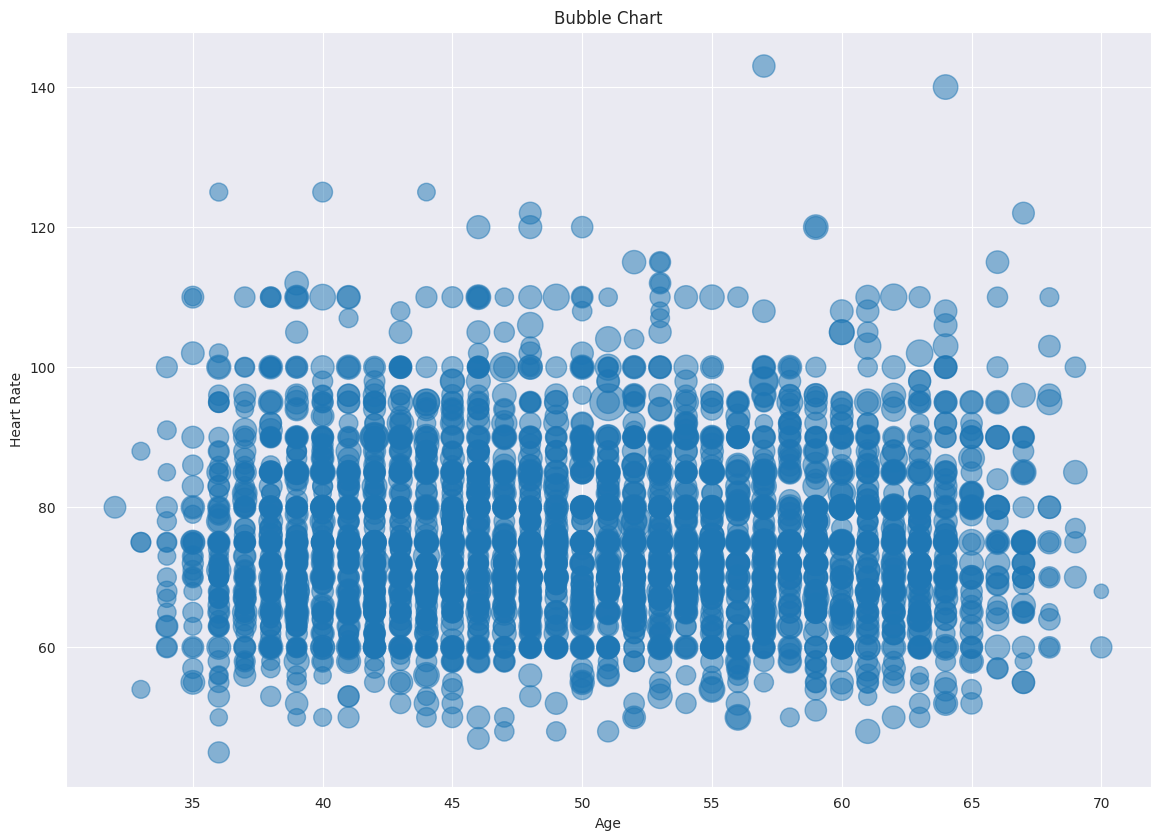

In [226]:
# Chart - 11 visualization code
#Writting a code to plot a bubble chart considering three variables i.e 'age', 'heartRate', and 'totChol'
plt.scatter(x=df['age'], y=df['heartRate'],s=df['totChol'], alpha=0.5)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("Bubble Chart")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 Pie Charts of Each Categorical Column or Column with Fixed Number of Values

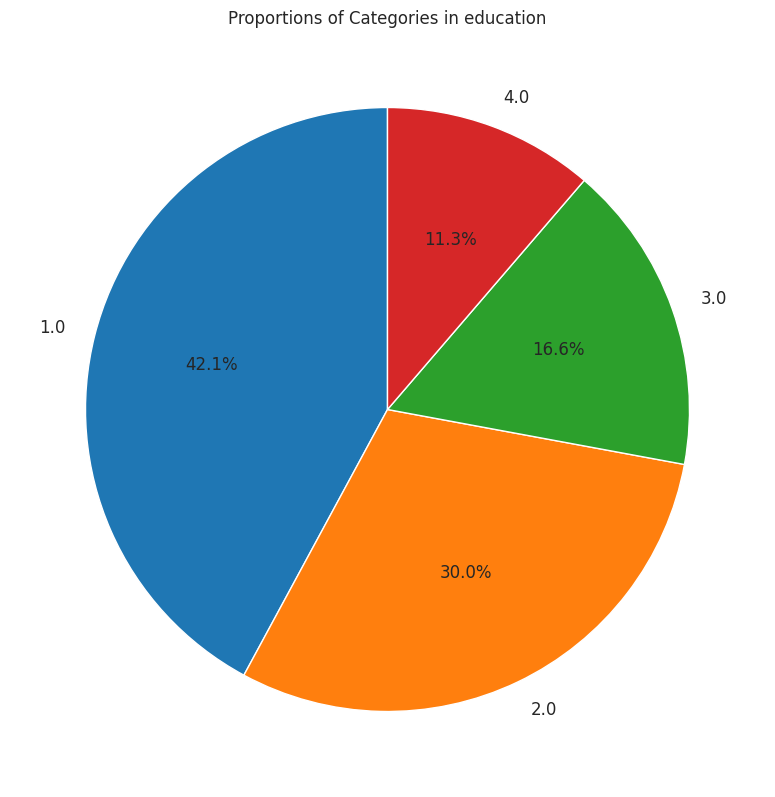

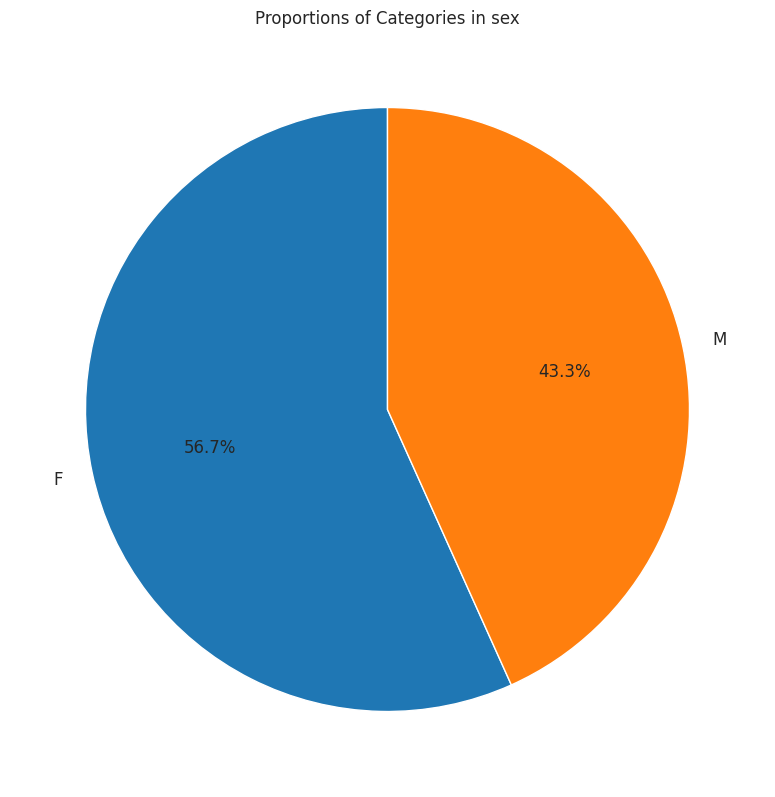

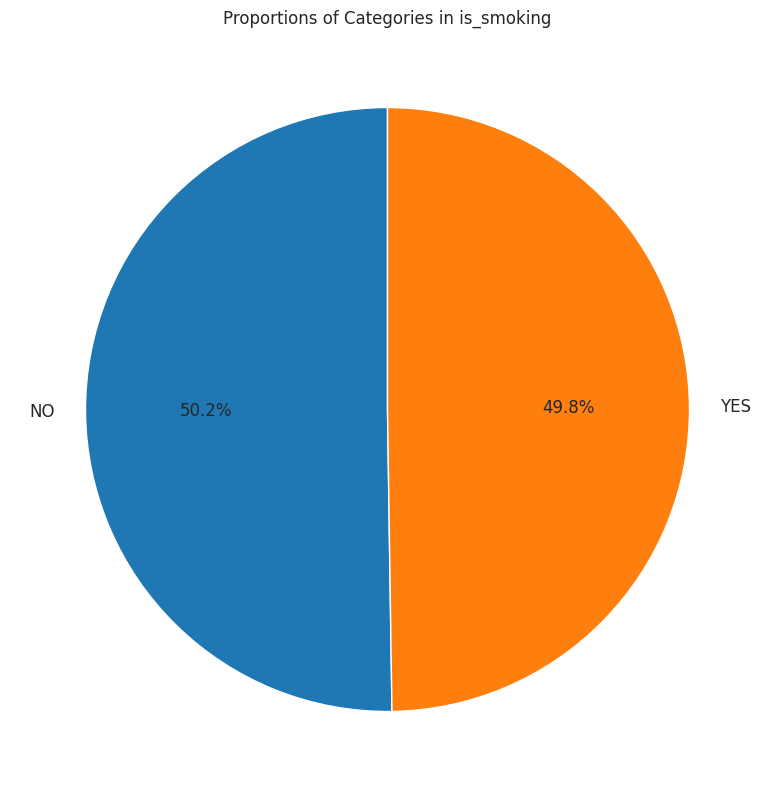

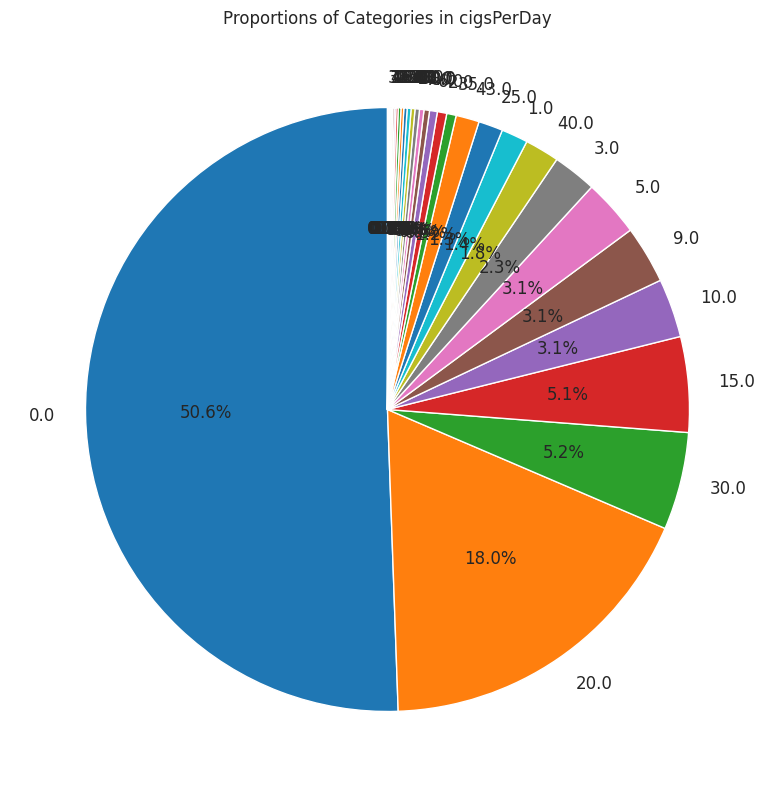

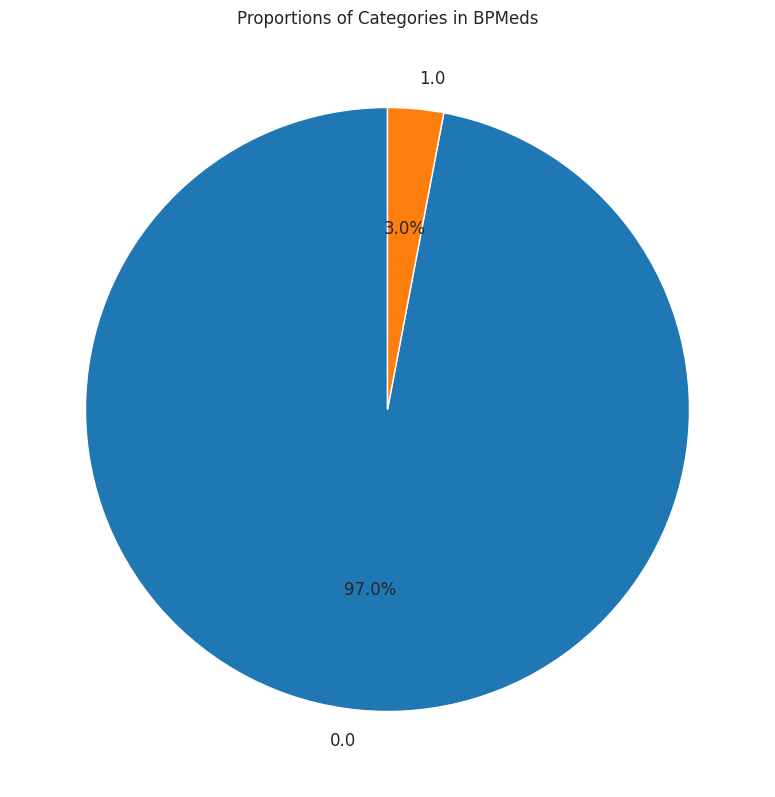

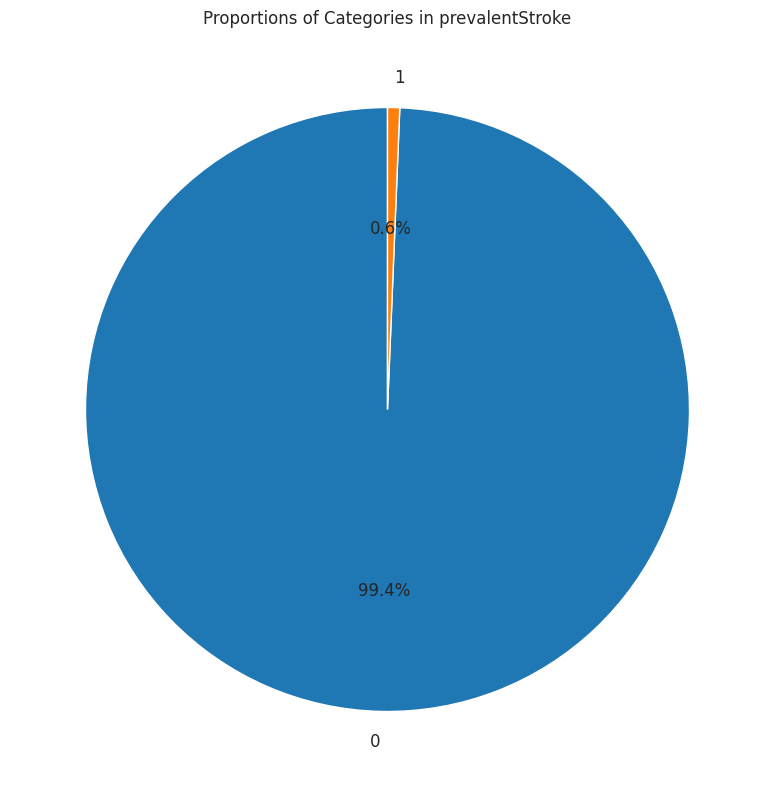

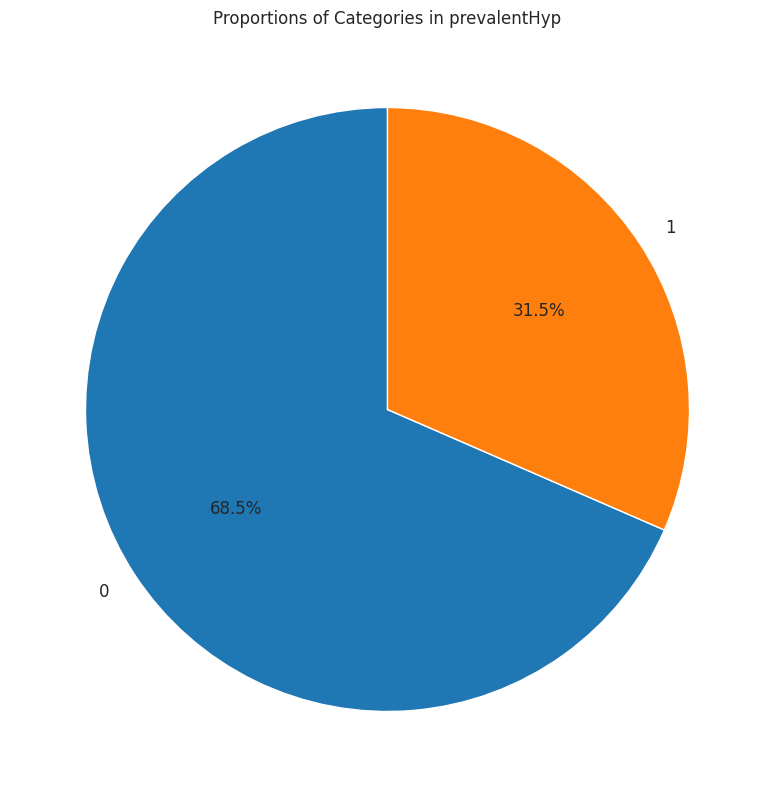

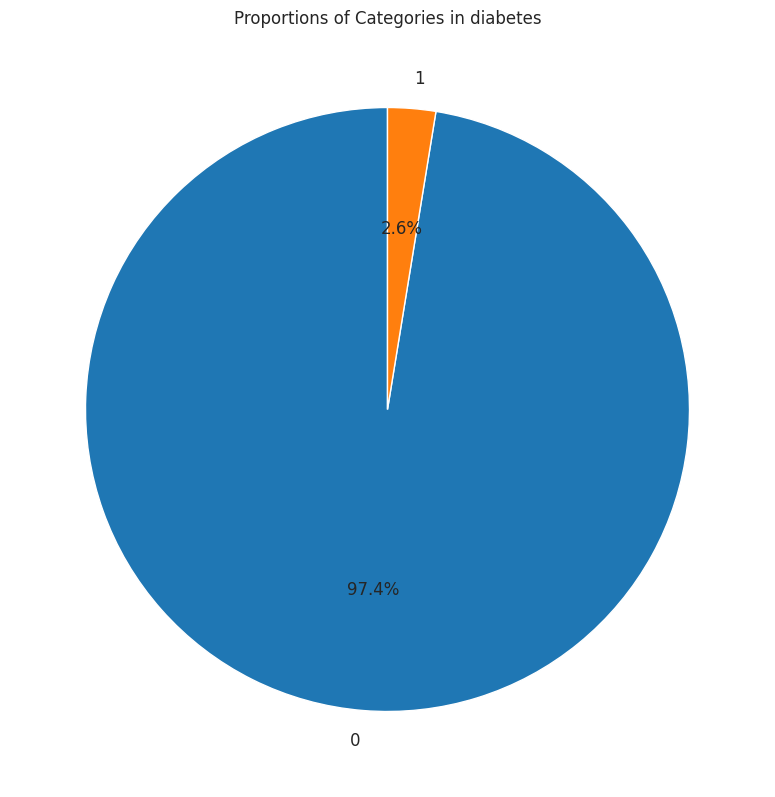

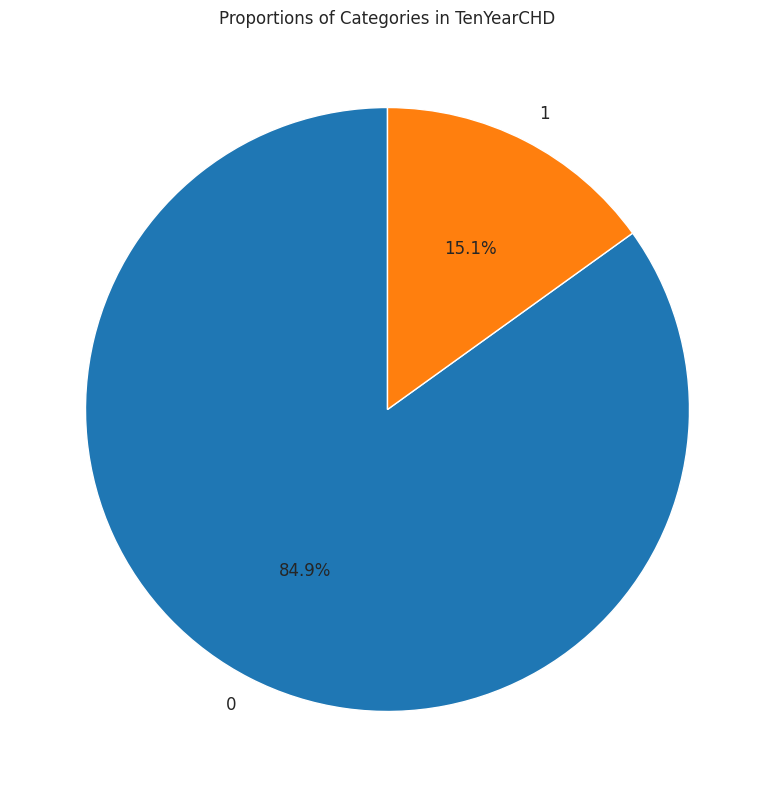

In [227]:
# Chart - 12 visualization code


list_of_variables=['education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
for col in list_of_variables:
  counts = df[col].value_counts()
  # Plot the donut chart
  plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
  plt.title(f'Proportions of Categories in {col}')
  plt.show()
  


##### 1. Why did you pick the specific chart?

The above charts have been used to find the proportions of each category present in each categorical column.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained from the above charts.
* 42.1% people have education level 1, 30.0% people have education level 2, only 16.6% and 11.3% people have education levels 3 and 4, resepectively.

* In our dataset, 56.7% are females and 43.3% are males.

* Approximately half of the people don't smoke.

* And 18% people smoke 20 cigarettes per day.
* 97% people don't take BP meds.
* Only 0.6% people had earlier stroke.
* 68.5% people have prevalent hypertension and 31.5% haven't.
* Only 2.6% people have diabetes
* In our data, approximately 85% people don't have CHD and 15% people have CHD.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights suggest that the data is imbalanced.

#### Chart - 13 Line Plot between age and TenYearCHD (Bivariate)

<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

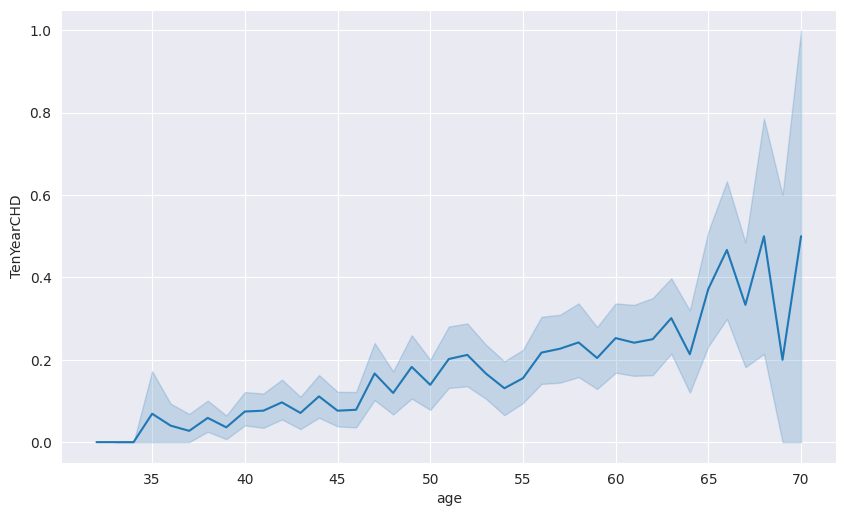

In [228]:
# Chart - 13 visualization code

#Writing a code for plotting line plot between the target variable and age, cigsPerDay, and heartRate
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y="TenYearCHD", data=df)


##### 1. Why did you pick the specific chart?

To check the linear relationship between age and target variable (TenYearCHD).

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clearly visible that the chances of getting CHD is proportional to the age. So, if a person is aged he has high risk of getting CHD and vice-versa.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will definitely help in predicting CHD because the target variable and age are possitively correlated.

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

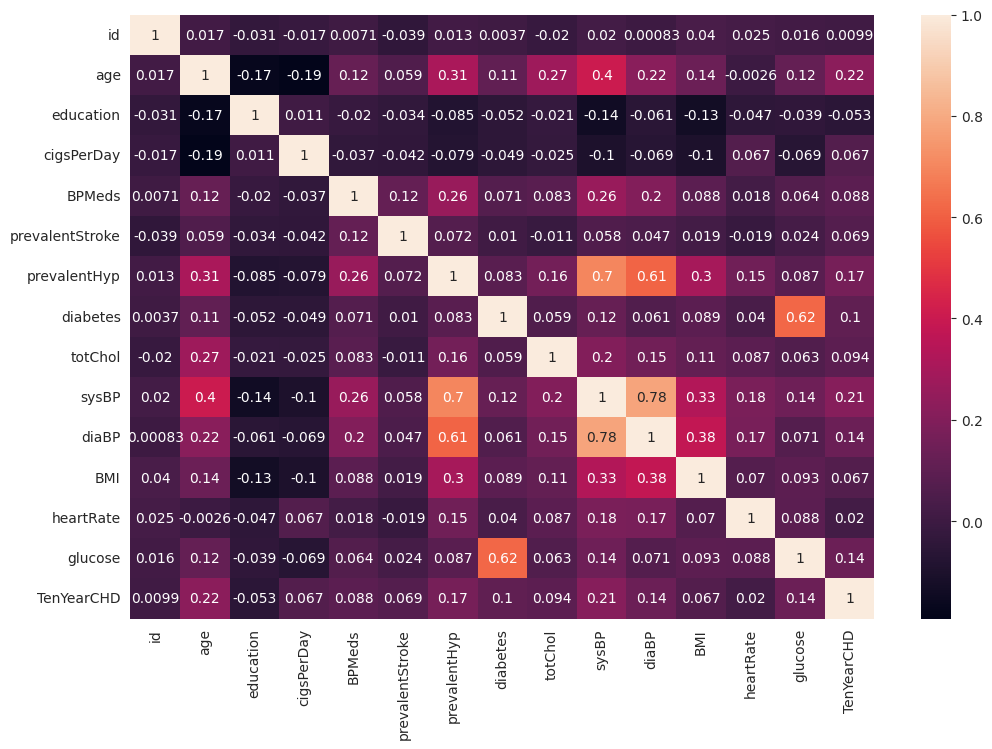

In [229]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df.corr(),annot=True)


##### 1. Why did you pick the specific chart?

To check the corelation between features.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained from above heatmap.
* sysBP (systolic blood pressure) and prevalent hypertension are positively 
correlated.

* diaBP (diastolic blood pressure) and prevalent hypertension are positively 
correlated.
* glucose and diabetes are positively correlated.

* diaBP and sysBP are highly (positive) correlation.
* BMI shows a positive correlation with diaBP and sysBP.

#### Chart - 15 - Pair Plot 

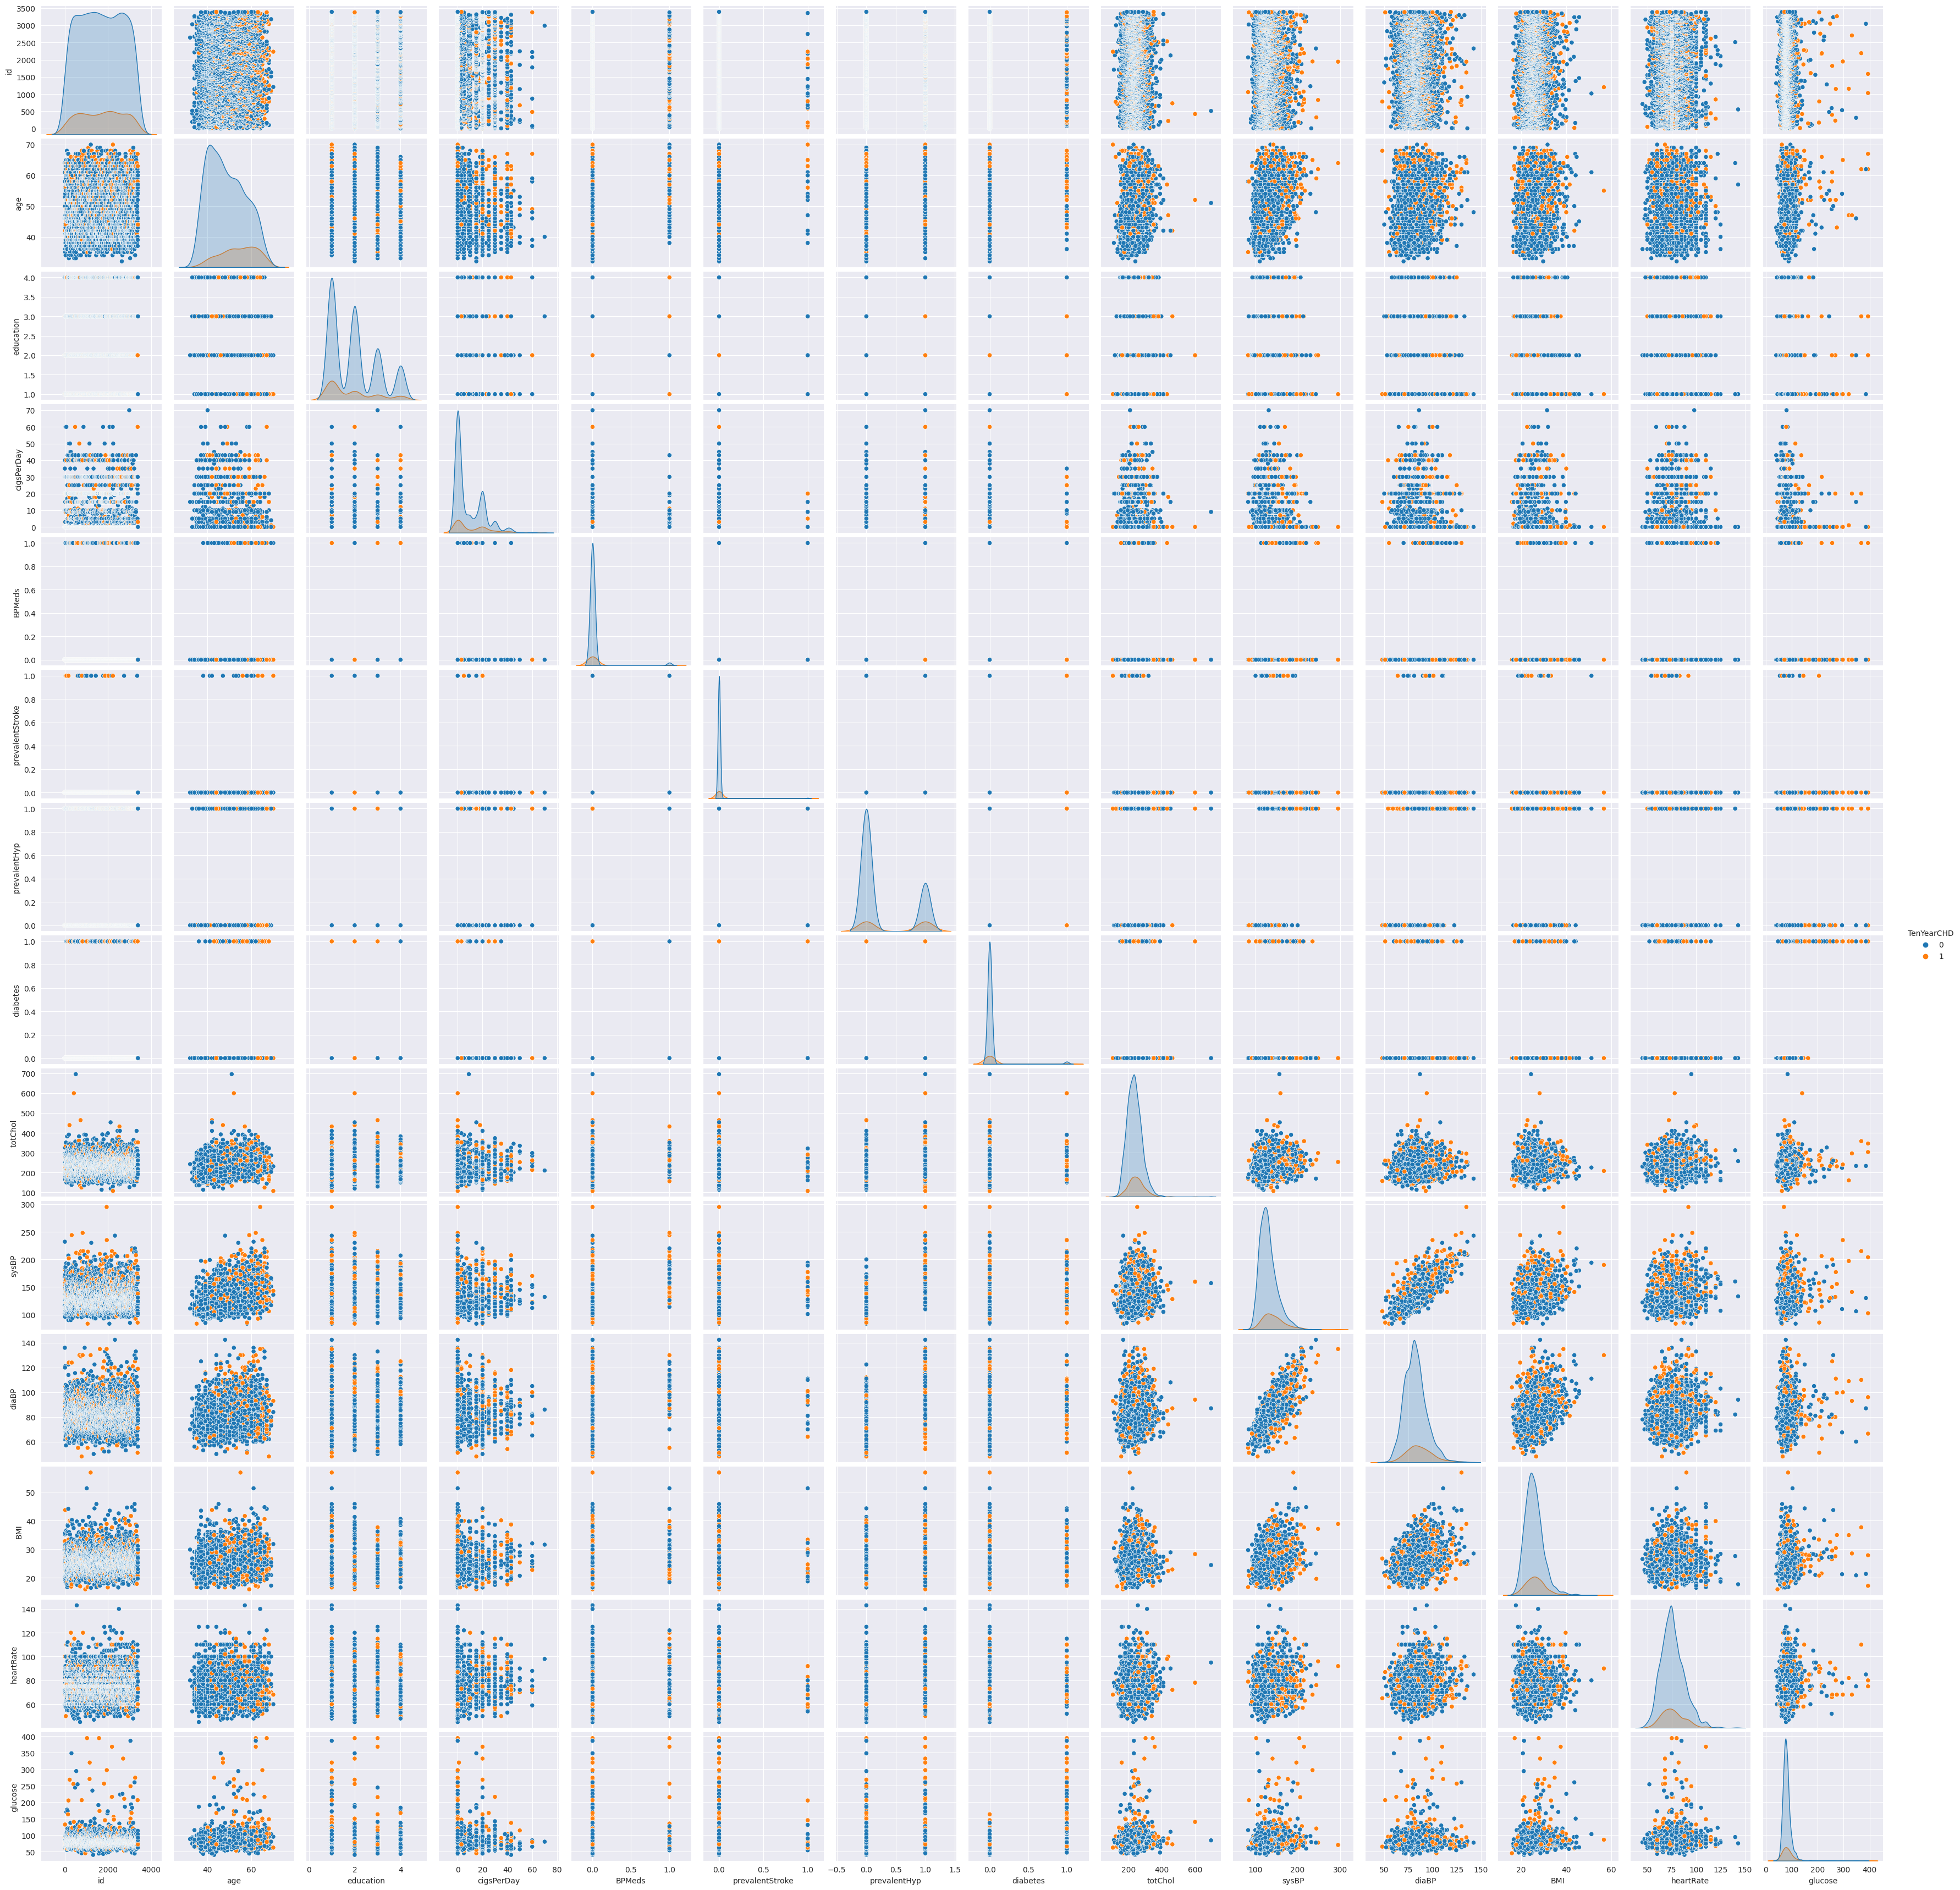

In [230]:
from seaborn.axisgrid import pairplot
# Pair Plot visualization code
# sns.pairplot(df)
# plt.show()

sns.pairplot(df, hue="TenYearCHD")

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.- Patient have common risk for devoloping CHD

2.- There is no relation between the features and devoloping CHD

3.-

### Hypothetical Statement - 1:T-test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups.The t-test is typically used when the sample size is small, or when the population standard deviation is unknown. There are several types of t-tests, including the Student's t-test and the Welch's t-test, which are used for different types of data and research questions.

Ho: On average, Patients have the common risk of devoloping heart disease

Ha:  On average, Patients have not the common risk of devoloping heart disease




#### 2. Perform an appropriate statistical test.

In [231]:
import scipy #importing library

In [232]:
# Perform Statistical Test to obtain P-Value
def ttest(col1, col2, varname ):
    t, p = scipy.stats.ttest_ind(col1,col2)
    #print('t=%.2f, p=%.30f' % (t, p))
    print("ttest_ind:               t = %g  p = %g" % (t, p))

    if p > 0.05:
       print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
    else:
       print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')



In [233]:
#Defining data variables 
CHD = df[df.TenYearCHD == 0]
NoCHD = df[df.TenYearCHD == 1]

In [234]:
ttest(CHD.age,NoCHD.age,"Age")

ttest_ind:               t = -13.4365  p = 3.86915e-40
reject null hypothesis Age has impact on risk of devoloping CHD


In [235]:
#effect of cigssperday
ttest(CHD.cigsPerDay,NoCHD.cigsPerDay,"cigsPerDay")

ttest_ind:               t = nan  p = nan
reject null hypothesis cigsPerDay has impact on risk of devoloping CHD


In [236]:
ttest(CHD.diabetes,NoCHD.diabetes,"Diabetes")

ttest_ind:               t = -6.0676  p = 1.44156e-09
reject null hypothesis Diabetes has impact on risk of devoloping CHD


##### Which statistical test have you done to obtain P-Value?

A hypothesis t-test is a statistical test used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation

##### Why did you choose the specific statistical test?

A t-test is used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation.

### Hypothetical Statement - 2 : chi squared test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The chi-squared test is a statistical test used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. It is commonly used to determine if there is a significant association between two categorical variables.

Ho = There's no relation between features and devoloping CHD

Ha = both are related to each other 

#### 2. Perform an appropriate statistical test.

In [237]:
from scipy.stats import chi2_contingency

In [238]:
# Perform Statistical Test to obtain P-Value
def chi2_test(col1, col2, varname):
  contingency_data = pd.crosstab(col1, col2)
  stat, p, dof, expected = chi2_contingency(contingency_data)
  print("Chi-Square Value: " + stat.astype(str))
  print("P Value: " + p.astype(str))
  if p > 0.05:
     print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
  else:
     print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')


In [239]:
chi2_test(df.education, df.TenYearCHD, "gender")

Chi-Square Value: 22.16105229004903
P Value: 6.038646749234552e-05
reject null hypothesis gender has impact on risk of devoloping CHD


In [240]:
chi2_test(df.BPMeds, df.TenYearCHD, "BPMeds")

Chi-Square Value: 24.497970055393846
P Value: 7.438816815316195e-07
reject null hypothesis BPMeds has impact on risk of devoloping CHD


In [241]:
chi2_test(df.is_smoking, df.TenYearCHD, "Smoking")

Chi-Square Value: 3.763250993795598
P Value: 0.05239062274853224
fail to reject null hypothesis Smoking has no effect on  devoloping CHD


##### Which statistical test have you done to obtain P-Value?

The chi-squared test-The test is based on the chi-squared distribution, and the p-value obtained from the test can be used to determine the significance of the difference between the observed and expected frequencies.

##### Why did you choose the specific statistical test?

The chi-squared test is used in hypothesis testing to determine if there is a significant difference between the expected frequencies and the observed frequencies in one or more categorical variables. It is used to test the goodness of fit of a theoretical distribution to a set of data, or to test for independence between two categorical variables in a contingency table.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [242]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [243]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [244]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Treatment of **education** feature

In [245]:
#Hence, the education is a categorical column so, we replace the missing value in education column with mode. So, check the mode

df.education.mode()[0]

1.0

In [246]:
df.education.fillna(df.education.mode()[0],inplace=True)


In [247]:
df.education.unique()

array([2., 4., 1., 3.])

Treatment of **CigsPerDay** feature

<AxesSubplot:ylabel='Density'>

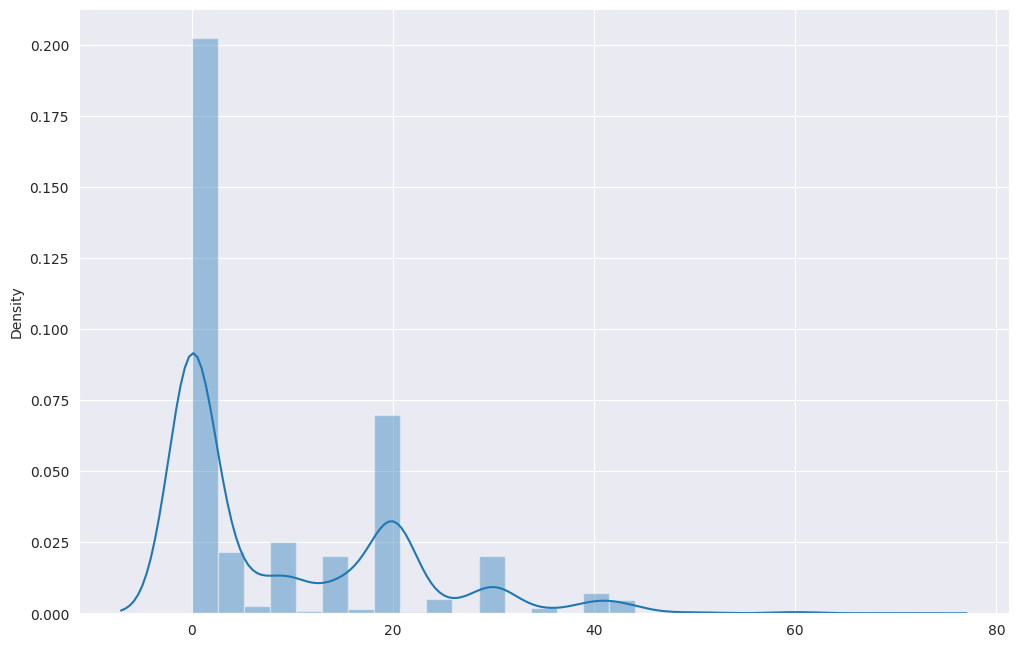

In [248]:
sns.distplot(x=df.cigsPerDay)

In [249]:
df.cigsPerDay.mode()[0]

0.0

In [250]:
df.cigsPerDay.fillna(df.cigsPerDay.mode()[0],inplace=True)

In [251]:
df['cigsPerDay'].describe()

count    3390.000000
mean        9.010619
std        11.862839
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

Treatment of **BPMeds** column

In [252]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [253]:
df.BPMeds.fillna(df.BPMeds.mode()[0], inplace=True)

Treatment of **heartRate** column

<AxesSubplot:ylabel='Density'>

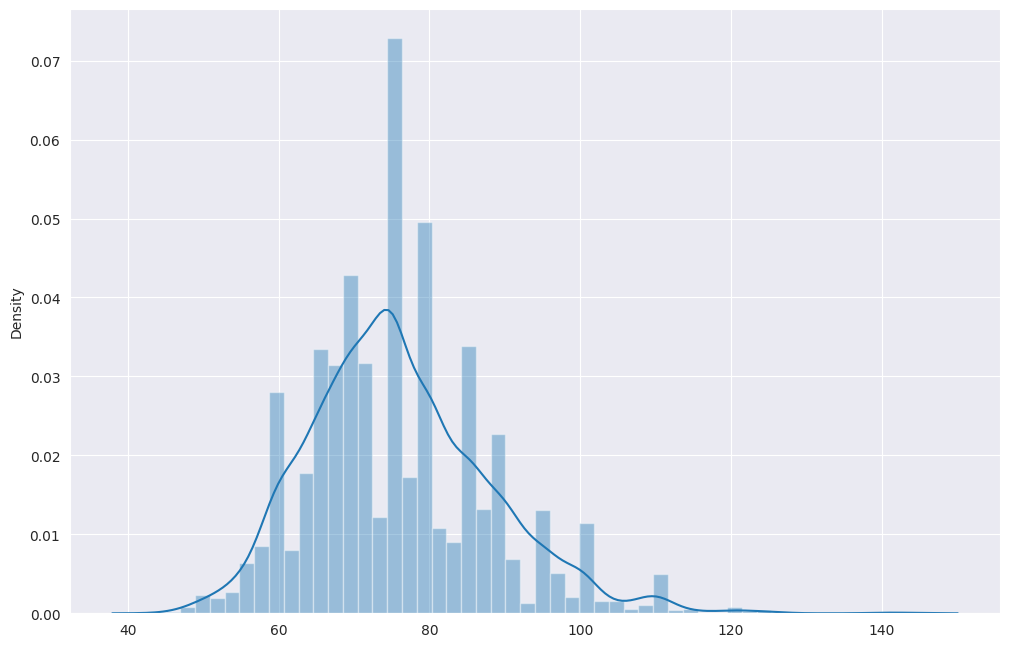

In [254]:
sns.distplot(x=df.heartRate) # plot the density plot of heartRate to check its distribution

In [255]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [256]:
df.heartRate.median()

75.0

In [257]:
df.heartRate.mode()

0    75.0
dtype: float64

In [258]:
df.heartRate.mean()

75.97727943346119

In [259]:
df.heartRate.median()

75.0

In [260]:
# Replace the null value with median (or mode or mean because they are all equal)
df.heartRate.fillna(df.heartRate.median(),inplace=True) 

Treatment of **totChol**

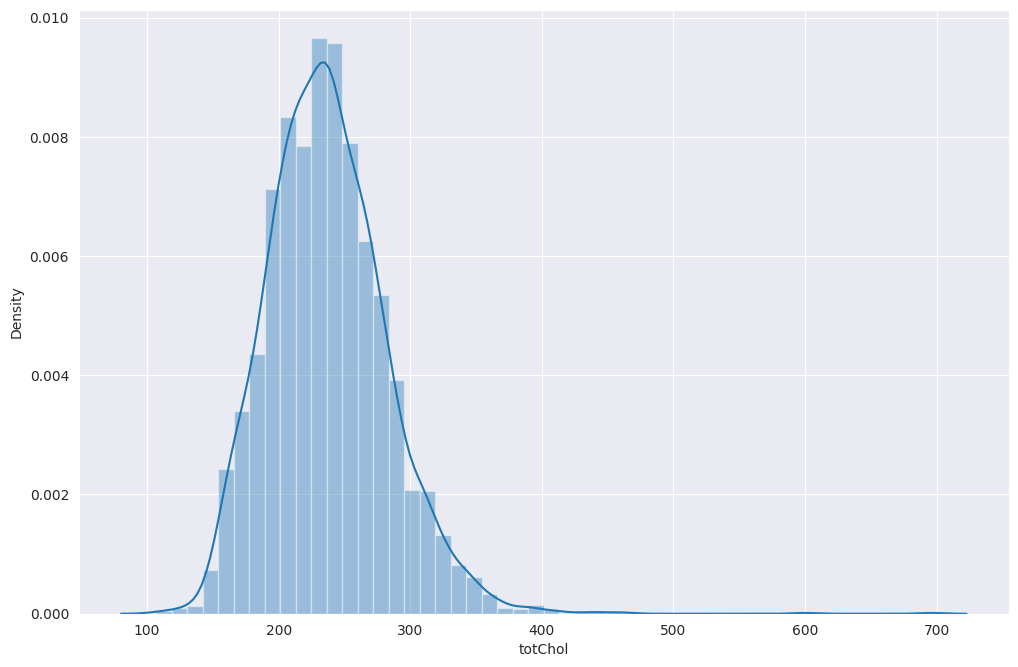

In [261]:
ax=sns.distplot(df.totChol,kde=True)


In [262]:
df.totChol.describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [263]:
df.totChol.mode()

0    240.0
dtype: float64

In [264]:
df.totChol.median()

234.0

In [265]:
df.totChol.fillna(df.totChol.median(),inplace=True) #Here the totChol shows a positive skew data so, replace the null value with median

Treatment of **glucose** column

<AxesSubplot:ylabel='Density'>

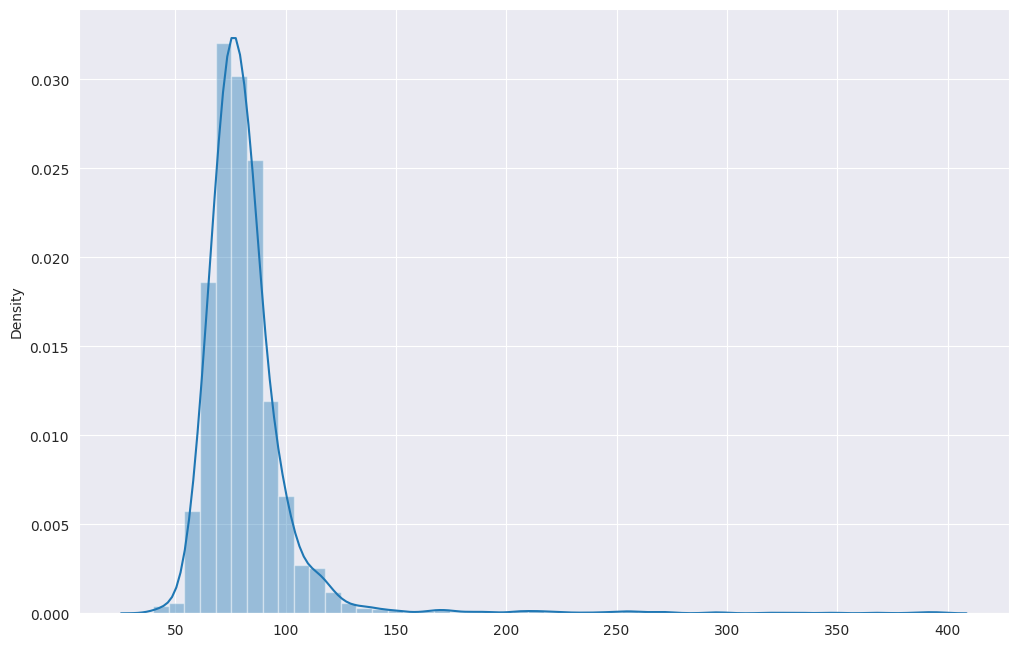

In [266]:
sns.distplot(x=df.glucose, kde=True)

In [267]:
df.glucose.describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

The above density plot shows the distribution is slightly positive skewed. So, replace the null value with median.

In [268]:
df.glucose.fillna(df.glucose.median(), inplace=True)

Treatment of **BMI** column

<AxesSubplot:ylabel='Density'>

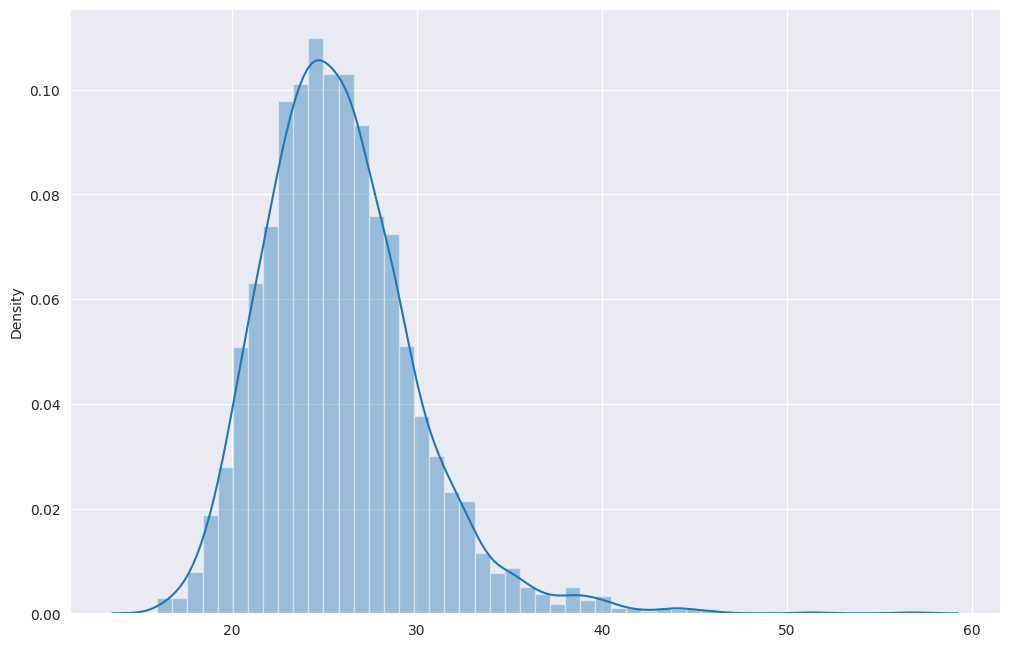

In [269]:
sns.distplot(x=df.BMI)

In [270]:
df.BMI.fillna(df.BMI.median(),inplace=True) # Here, BMI feature shows that its distribiution is slightly skewed so, replace null value with median

In [271]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In **education** column, the null values are replaced by mode because this column is categorical.

In **cigsPerDay** feature, the missing values are treated using mode because it contains a fixed number of integers.

In **BPMeds**, the null values are treated using the mode (which is 0) because lots of people are not on the blood pressure medication.

The **totChol** column represents a numerical column so, we replaced the null values with median because the distribution is slightly positive skewed.

The column **glucode**, we treat missing value with median because it shows a numerical column.

In **BMI** column, we replace the missing value with median because it is a numerical column.
The **heartRate** column has only one null value, and its mode, median, and mean are approximately equal. So, we can treat with any of these three parameters.

### 2. Handling Outliers

In [272]:
# Handling Outliers & Outlier treatments

In [273]:
df.describe().columns.to_list()

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

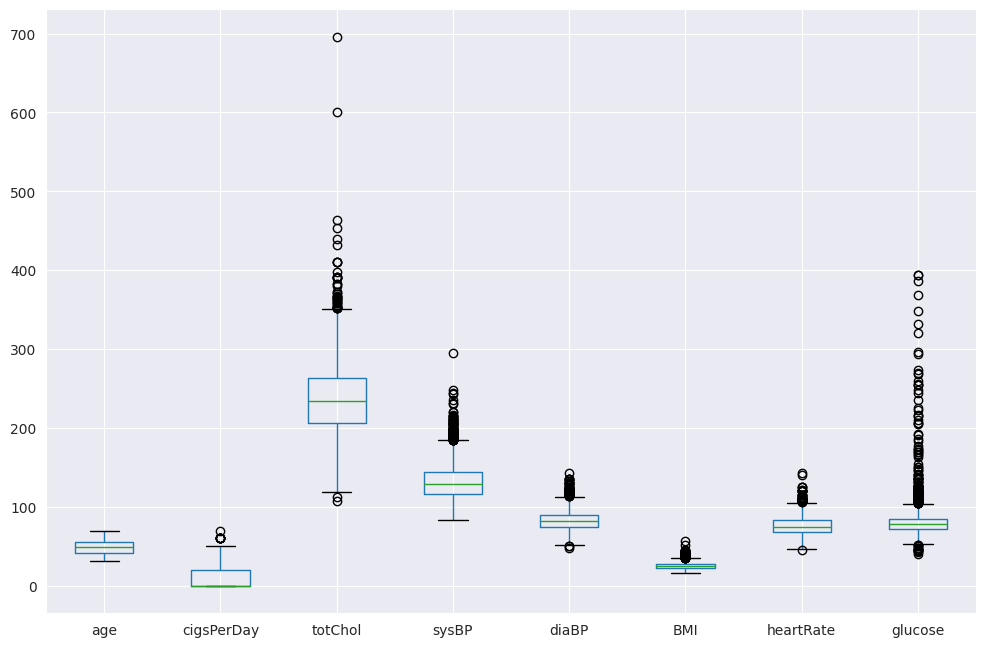

In [274]:
# for col in df.describe().columns.to_list():
#   plt.subplots(1,1)
#   ax=sns.boxplot(y=df[col])
#   ax.set_title(f'The boxplot of {col}')
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

In [275]:
dff = df.copy()
dff

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     0.0   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0  25.38   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [276]:
#cap_data(df[['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

In [277]:
def cap_outliers(df, columns, lower_threshold, upper_threshold):
    for col in columns:
        lower_cap = df[col].quantile(lower_threshold)
        upper_cap = df[col].quantile(upper_threshold)
        df[col] = df[col].clip(lower_cap, upper_cap)
    return df

columns_to_cap = ['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
capped_df = cap_outliers(df, columns_to_cap, lower_threshold=0.05, upper_threshold=0.95)


In [278]:
df.cigsPerDay.describe()

count    3390.000000
mean        8.512389
std        10.585444
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        30.000000
Name: cigsPerDay, dtype: float64

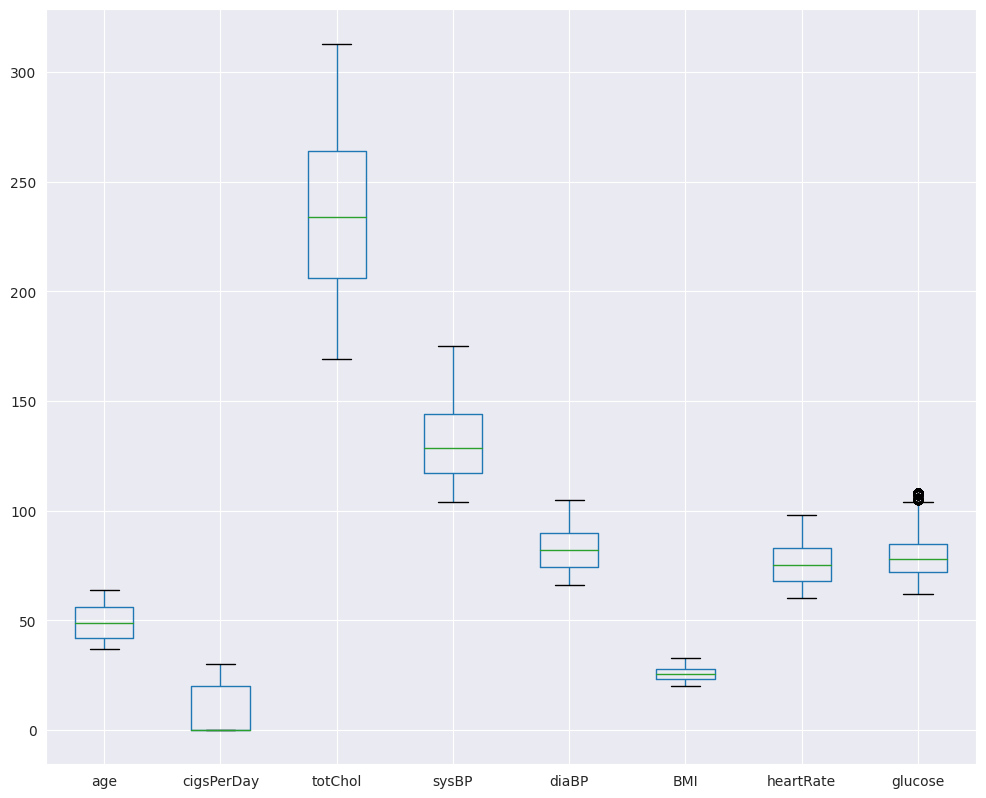

In [279]:
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [280]:
# Encode your categorical columns

In [281]:
categorical_col=set(list(df.columns))-set(list(df.describe().columns.to_list()))
categorical_col

{'is_smoking', 'sex'}

In [282]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [283]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [284]:
#np.where(condition, x, y)

df["sex"] = np.where(df.sex=='M', 1, 0)
df["is_smoking"] = np.where(df.is_smoking=='YES',1,0)

In [285]:
df['sex'].describe()

count    3390.000000
mean        0.432743
std         0.495529
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [286]:
df.drop(['id'],axis=1, inplace=True)

In [287]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0        2.0    0           1         3.0     0.0                0   
1  37.0        4.0    1           0         0.0     0.0                0   
2  46.0        1.0    0           1        10.0     0.0                0   
3  50.0        1.0    1           1        20.0     0.0                0   
4  64.0        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are two categorical columns in dataset i.e 'sex' and 'is_smoking'. I used binary encoding to treat these columns.
If sex="M", it is replaced with 1 else zero. If 'is_smoking'='YES' it is encoded as 1 else 0.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [288]:
# Manipulate Features to minimize feature correlation and create new features
def read_blood_pressure(df):
    # Create new column to store the hypertension category
    df['hypertension_category'] = None
    # Iterate over each row in the dataframe
    for i, row in df.iterrows():
        # Get the systolic and diastolic values from the dataframe rows
        systolic = row['sysBP']
        diastolic = row['diaBP']
        # Check for hypertension category
        if systolic < 120 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'normalBP'
        elif systolic >= 120 and systolic < 129 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'elevatedBP'
        elif (systolic >= 130 and systolic < 139) or (diastolic >= 80 and diastolic < 89):
            df.loc[i, 'hypertension_category'] = 'stage1_hypertension'
        elif (systolic >= 140 and systolic < 179) or (diastolic >= 90 and diastolic < 119):
            df.loc[i, 'hypertension_category'] = 'stage2_hypertension'
        else:
            df.loc[i, 'hypertension_category'] = 'critical'
    return df


In [289]:
read_blood_pressure(df)

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0     64.0        2.0    0           1         3.0     0.0                0   
1     37.0        4.0    1           0         0.0     0.0                0   
2     46.0        1.0    0           1        10.0     0.0                0   
3     50.0        1.0    1           1        20.0     0.0                0   
4     64.0        1.0    0           1        30.0     0.0                0   
...    ...        ...  ...         ...         ...     ...              ...   
3385  60.0        1.0    0           0         0.0     0.0                0   
3386  46.0        1.0    0           0         0.0     0.0                0   
3387  44.0        3.0    1           1         3.0     0.0                0   
3388  60.0        1.0    1           0         0.0     0.0                0   
3389  54.0        3.0    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.38       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  104.0   66.0  21.96       80.0   
3387             1         0    313.0  164.0  105.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD hypertension_category  
0        80.0           1   stage1_hypertension  
1        75.0           0   stage2_hypertension  
2        94.0           0              normalBP  
3        94.0           1   stage1_hypertension  
4        77.0           0   stage1_hypertension  
...       ...         ...                   ...  
3385    103.0           0            elevatedBP  
3386     84.0           0              normalBP  
3387     72.0           1   stage2_hypertension  
3388     85.0           0   stage2_hypertension  
3389     92.0           0            elevatedBP  

[3390 rows x 17 columns]

In [290]:
# now convert bp variables into number
def encode_bp(df):
    df['hypertension_category'] = df['hypertension_category'].apply(lambda x: 1 if x == 'normalBP' else (2 if x == 'elevatedBP' else (3 if x == 'stage1_hypertension' else (4 if x == 'stage2_hypertension' else (5 if x == 'critical' else x)))))
    return df


In [291]:
encode_bp(df)

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0     64.0        2.0    0           1         3.0     0.0                0   
1     37.0        4.0    1           0         0.0     0.0                0   
2     46.0        1.0    0           1        10.0     0.0                0   
3     50.0        1.0    1           1        20.0     0.0                0   
4     64.0        1.0    0           1        30.0     0.0                0   
...    ...        ...  ...         ...         ...     ...              ...   
3385  60.0        1.0    0           0         0.0     0.0                0   
3386  46.0        1.0    0           0         0.0     0.0                0   
3387  44.0        3.0    1           1         3.0     0.0                0   
3388  60.0        1.0    1           0         0.0     0.0                0   
3389  54.0        3.0    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.38       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  104.0   66.0  21.96       80.0   
3387             1         0    313.0  164.0  105.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  hypertension_category  
0        80.0           1                      3  
1        75.0           0                      4  
2        94.0           0                      1  
3        94.0           1                      3  
4        77.0           0                      3  
...       ...         ...                    ...  
3385    103.0           0                      2  
3386     84.0           0                      1  
3387     72.0           1                      4  
3388     85.0           0                      4  
3389     92.0           0                      2  

[3390 rows x 17 columns]

#### 2. Feature Selection

In [292]:
df2=df.copy()

In [293]:
df2.drop(['sysBP', 'diaBP'], axis=1, inplace=True)

since, cigs_per_day column is already having the information about smokers so we dont need is_smoking column 

In [294]:
df2.drop(["is_smoking"],axis=1,inplace=True)

<AxesSubplot:>

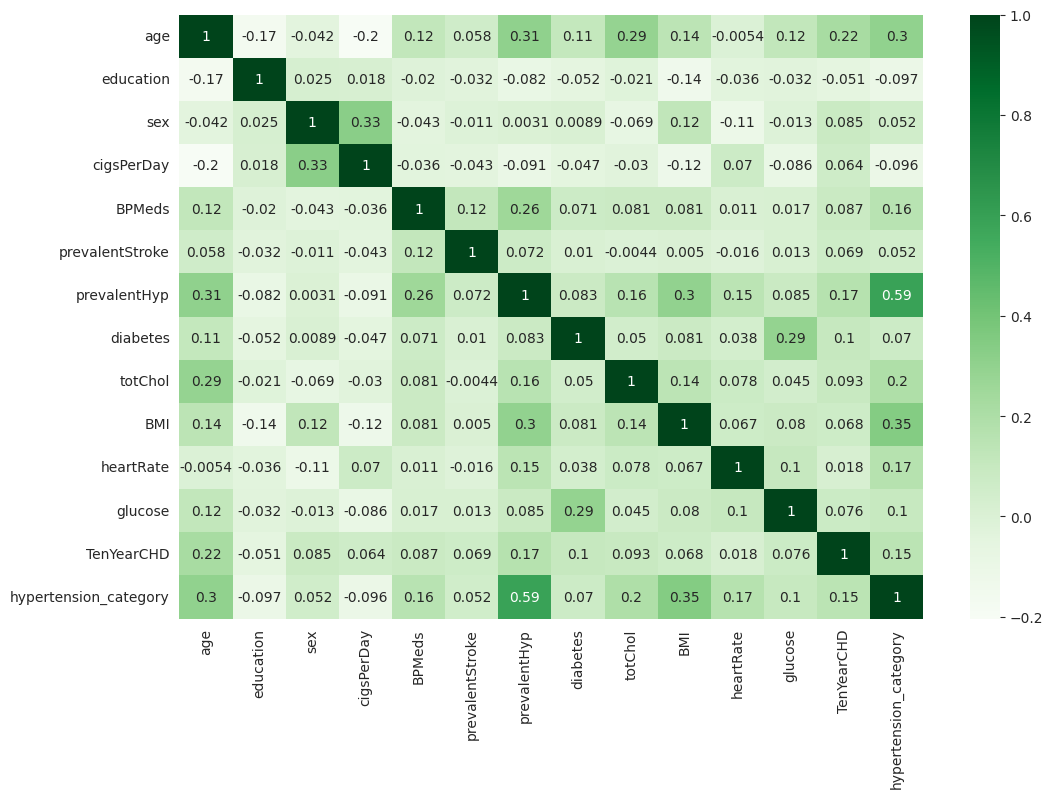

In [295]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df2.corr(),cmap= 'Greens',annot=True)

##### What all feature selection methods have you used  and why?

First we checked every variables through Data wrangling and Data visulisation and their relationship between them after that we select feature as per their importance how they affect to Produce CHD.
then we have removed some variables by converting them into one features in the sction of Features manupulation and also we removed some useless variable .

##### Which all features you found important and why?

In [296]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [298]:
# Getting feature importance of selected features
randomforest_embedded(x=df2.drop(["TenYearCHD"],axis=1),y=df["TenYearCHD"])

Features  Importances
5         prevalentStroke     0.005583
7                diabetes     0.010202
4                  BPMeds     0.010701
6            prevalentHyp     0.023069
2                     sex     0.024825
12  hypertension_category     0.048094
1               education     0.050340
3              cigsPerDay     0.069523
10              heartRate     0.128441
11                glucose     0.141587
0                     age     0.151634
8                 totChol     0.161873
9                     BMI     0.174129

Finally we found out 13 indepenedent features which are affecting to devolope CHD and valdate their importances through Embedded method using random forest classifier feature importance and we can see on above graph all the features have some importance none of them are zero.

### 5. Data Transformation

In [299]:
for column in df2.columns:
    print(column)
    print(df2[column].skew())
    

age
0.19933505114565864
education
0.7352403272651097
sex
0.2716141401804689
cigsPerDay
0.7987202700140527
BPMeds
5.563972386285764
prevalentStroke
12.297612002671828
prevalentHyp
0.7951885864720627
diabetes
6.001977441386289
totChol
0.2009466755219177
BMI
0.33496376508337866
heartRate
0.3967279461624882
glucose
0.7287503478673296
TenYearCHD
1.953181703698407
hypertension_category
-0.3807787326318706


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

NO, from above skewness result we can see that our data is following gaussian distribution  

so we dont need to transform the data.

### 6. Data Scaling

In [300]:
df3=df2.copy()

In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
# Scaling your data
#applying standardScaler 
scaler = StandardScaler()
columns = ['age', 'cigsPerDay', 'totChol', 'heartRate','hypertension_category', 'BMI', 'heartRate', 'glucose' ]
df3[columns] = scaler.fit_transform(df3[columns])

##### Which method have you used to scale you data and why?

StandardScaler is used to resize the distribution

StandardScaler is a pre-processing technique in machine learning and statistics used to standardize a dataset, meaning it scales the data so that it has a mean of 0 and a standard deviation of 1. This is useful because many machine learning algorithms require that the input data is in a standard scale in order to work properly.

In [303]:
df3.head(1) #checking scalled data

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  \
0  1.738547        2.0    0   -0.520829     0.0                0   

   prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0             0         0 -0.380748 -0.082252   1.328161  0.012189   

   TenYearCHD  hypertension_category  
0           1               0.277079

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [304]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [305]:
# Split your data to train and test. Choose Splitting ratio wisely.
x, y = df3.loc[:, df3.columns != 'TenYearCHD'], df3['TenYearCHD']

In [306]:
#importing library to split
from sklearn.model_selection import train_test_split
#dividing the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0, stratify=y)
print(x_train.shape)
print(x_test.shape)

(2712, 13)
(678, 13)


##### What data splitting ratio have you used and why? 

Here we are taking the data splitting ratio is 80:20, this means that 80% of the data is used for training and 20% of the data is used for testing. This is a commonly used ratio in machine learning as it allows for a sufficient amount of data to be used for training the model, while also reserving a meaningful portion of the data for testing the model's performance on unseen data. This helps ensure that the model is able to generalize well to new, unseen data and has not overfitted to the training data.

### 9. Handling Imbalanced Dataset

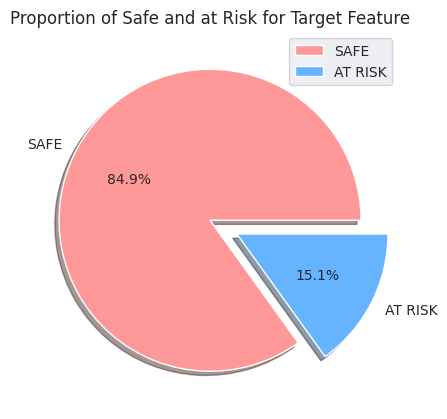

In [307]:
#lets check data is imbalanced or not
#trying to plot pie chart to show 
plt.figure(figsize=(7,5), dpi=100)
proportion = df['TenYearCHD'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#ff9999','#66b3ff'])
plt.legend()
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Yes as we can see our data is highly imbalanced

Majority of data points belongs to safe (no risk of devoloping CHD "0") class.

In [308]:
# Handling Imbalanced Dataset (If needed)
#importing library for handling imbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42) #creating instance

In [309]:
x_train_imbal, y_train_imbal = smote.fit_resample(x,y) #fitting predictor and target

In [310]:
x_train_imbal

age  education  sex  cigsPerDay    BPMeds  prevalentStroke  \
0     1.738547   2.000000    0   -0.520829  0.000000                0   
1    -1.502044   4.000000    1   -0.804278  0.000000                0   
2    -0.421847   1.000000    0    0.140554  0.000000                0   
3     0.058241   1.000000    1    1.085387  0.000000                0   
4     1.738547   1.000000    0    2.030220  0.000000                0   
...        ...        ...  ...         ...       ...              ...   
5753  1.341524   3.423018    1    1.830379  0.000000                0   
5754  1.188651   1.000000    0   -0.804278  0.000000                0   
5755  0.896587   1.196988    1   -0.804278  0.000000                0   
5756  0.963239   1.459721    0   -0.114682  0.459721                0   
5757  1.589979   1.000000    0    1.085387  0.000000                0   

      prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0                0         0 -0.380748 -0.082252   1.328161  0.012189   
1                1         0 -0.608906  1.171243  -0.361461 -0.417344   
2                0         0  0.354425 -1.518488   1.140426  1.214882   
3                1         0 -0.076539  0.740087  -0.736932  1.214882   
4                0         0  0.126268  0.214704  -0.549196 -0.245531   
...            ...       ...       ...       ...        ...       ...   
5753             1         0 -0.310493  0.424600  -0.422918  0.914274   
5754             1         0  0.733764  1.478642   1.956228  2.002067   
5755             0         0  0.538020 -0.123219  -1.487875 -0.711497   
5756             1         0  0.473855  0.114331  -0.295622  1.254375   
5757             0         0 -0.078413 -1.564487  -1.450666  1.049879   

      hypertension_category  
0                  0.277079  
1                  1.173358  
2                 -1.515477  
3                  0.277079  
4                  0.277079  
...                     ...  
5753               1.173358  
5754               1.173358  
5755              -0.619199  
5756               0.277079  
5757               0.348137  

[5758 rows x 13 columns]

In [311]:
y_train_imbal

0       1
1       0
2       0
3       1
4       0
       ..
5753    1
5754    1
5755    1
5756    1
5757    1
Name: TenYearCHD, Length: 5758, dtype: int64

In [312]:
#now lets check length of our dataset
#after and before
print("balanced data shape (resampled)" , len(x_train_imbal))
print("Original data shape" , len(x_train))

balanced data shape (resampled) 5758
Original data shape 2712


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

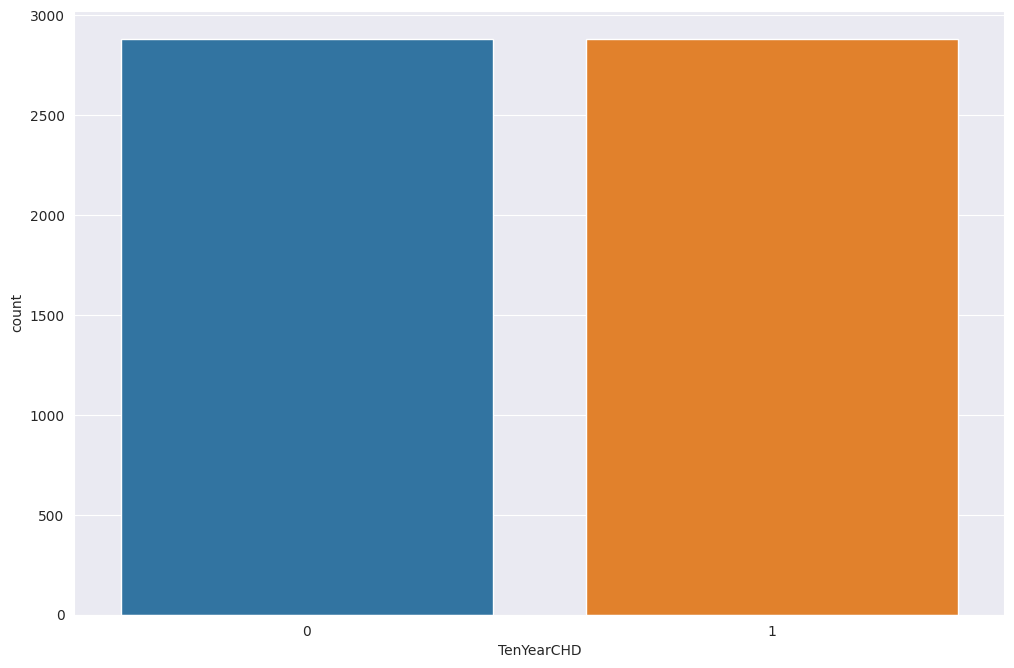

In [313]:
sns.countplot(y_train_imbal) #checking through plot

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method for oversampling in machine learning. It is used to balance the class distribution by generating synthetic samples for the minority class. The synthetic samples are created by interpolating between existing minority class samples. The interpolation is done by selecting two or more nearest minority class samples and taking the linear combination of their feature values. This allows for the creation of new samples that are similar to the existing minority class samples, thereby increasing the overall number of minority class samples and balancing the class distribution.

In [314]:
#Again spliting data from blanced data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_train_imbal,y_train_imbal , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4606, 13)
(1152, 13)


## ***7. ML Model Implementation***

### ML Model - 1 - **Logistic Regression**

In [315]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [316]:
# Checking the coefficients
clf.coef_

array([[ 0.67175316, -0.03670567, -0.20367296,  0.45905879,  0.47509739,
        -0.52028117, -0.20140483,  0.21041854,  0.11636448,  0.05401961,
        -0.08405689,  0.13322231,  0.38263325]])

In [317]:
# Checking the intercept value
clf.intercept_

array([-0.08268641])

In [318]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [319]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [320]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.673469387755102
The accuracy on test data is  0.6640625


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1512  814]
 [ 690 1590]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

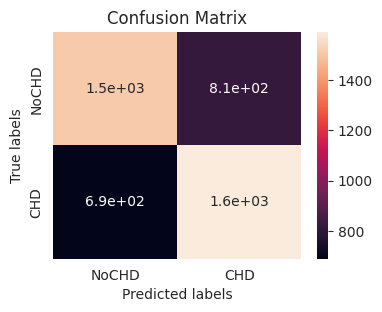

In [321]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[355 198]
 [189 410]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

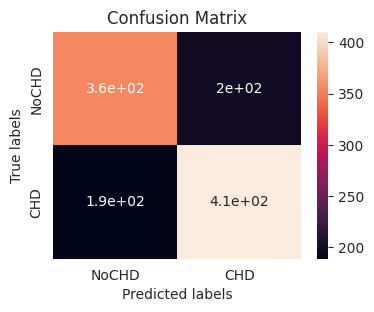

In [322]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [323]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2326
           1       0.66      0.70      0.68      2280

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606

 
roc_auc_score
0.6737057066570121


In [324]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       553
           1       0.67      0.68      0.68       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152

 
roc_auc_score
0.6632135536321838


The accuracy of the test data is 66.4%, and 67.3% for training data.

For **Train Data**:-
The precision is 69%, recall is 65%, f1-score is 67% for **NoCHD** or **0**. And the precision is 66%, recall is 70%, f1-score is 68% for **CHD** or **1**. The roc_auc_score is 67.3%.

For **Test Data**:-
The precision is 65%, recall is 64%, f1-score is 65% for **NoCHD** or **0**. And the precision is 67%, recall is 68%, f1-score is 68% for **CHD** or **1**. The roc_auc_score is 66.3%.



#### 2. Cross- Validation & Hyperparameter Tuning

In [325]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.674635 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [326]:
from sklearn.metrics import classification_report 

In [327]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [328]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2326
           1       0.66      0.70      0.68      2280

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606

 
roc_auc_score
0.6737057066570121


In [329]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       553
           1       0.67      0.68      0.68       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152

 
roc_auc_score
0.6632135536321838


##### Which hyperparameter optimization technique have you used and why?

We have two options (i.e. GridSearchCV and RandomizedSeachCV) to tune hyperparameter.

Hence, we know that GridSearchCV checks all combinations of hyperparameters before giving the optimum values of hyperparameters. And it takes lot of space and time to process the data and give optimum result. So, it is an appropriate technique of cross-validation for the small datasets.

Whereas, the RandomizedSeachCV doesn't check for each combinations of hyperparameters, and it is best for large datasets.

Hence, our dataset contains few thousands of observations so, we used the GridSearchCV to get the best result.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above metric charts (after tuning hyperparameter), we can see that there is no improvement in the accuracy, precision, recall, etc.


### ML Model - 2 - **Random Forest Classifier**

In [330]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [331]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8993055555555556


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [   0 2280]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

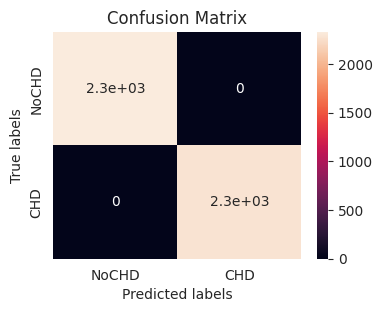

In [332]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[501  52]
 [ 64 535]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

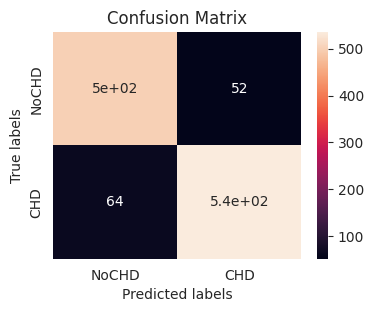

In [335]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)
plt.figure(figsize=(4,3))
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [336]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

 
roc_auc_score
1.0


In [337]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       553
           1       0.91      0.89      0.90       599

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152

 
roc_auc_score
0.8995613545179276


The accuracy of the test data is 90.3%, and 100% for training data.

For **Train Data**:-
The precision is 100%, recall is 100%, f1-score is 100% for **NoCHD** or **0**. And the precision is 100%, recall is 100%, f1-score is 100% for **CHD** or **1**. The roc_auc_score is 100%.

For **Test Data**:-
The precision is 89%, recall is 91%, f1-score is 90% for **NoCHD** or **0**. And the precision is 91%, recall is 90%, f1-score is 91% for **CHD** or **1**. The roc_auc_score is 90.3%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [338]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

In [339]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.750851 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


[[1838  488]
 [ 501 1779]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

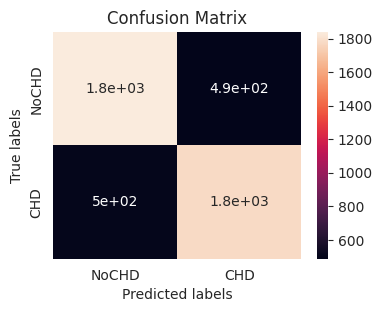

In [340]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[417 136]
 [143 456]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

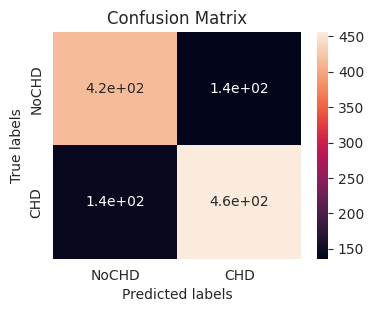

In [341]:
# Get the confusion matrix for both train and test

labels =['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [342]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2326
           1       0.78      0.78      0.78      2280

    accuracy                           0.79      4606
   macro avg       0.79      0.79      0.79      4606
weighted avg       0.79      0.79      0.79      4606

 
roc_auc_score
0.7852304611485723


In [343]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       560
           1       0.76      0.77      0.77       592

    accuracy                           0.76      1152
   macro avg       0.76      0.76      0.76      1152
weighted avg       0.76      0.76      0.76      1152

 
roc_auc_score
0.7576687486981014


##### Which hyperparameter optimization technique have you used and why?

We have two options (i.e. GridSearchCV and RandomizedSeachCV) to tune hyperparameter.

Hence, we know that GridSearchCV checks all combinations of hyperparameters before giving the optimum values of hyperparameters. And it takes lot of space and time to process the data and give optimum result. So, it is an appropriate technique of cross-validation for the small datasets.

Whereas, the RandomizedSeachCV doesn't check for each combinations of hyperparameters, and it is best for large datasets.

Hence, our dataset contains few thousands of observations so, we used the GridSearchCV to get the best result.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, we didn't seen any improvementnin our model after using cross-validation, even our accuraccy decreses after tuning hyperparameter.


### ML Model - 3 - **SVM Classifier**

In [344]:
#importing library
from sklearn import svm 

In [345]:
#assigning model
svcm = svm.SVC(kernel='poly')

#fitting model
svcm.fit(X_train,y_train)

SVC(kernel='poly')

In [346]:
#getting prediction
train_class_prediction = svcm.predict(X_train) 
test_class_prediction = svcm.predict(X_test) 

In [347]:
# Getting the accuracy scores. 
train_accuracy_svc = accuracy_score(train_class_prediction, y_train) 
test_accuracy_svc = accuracy_score(test_class_prediction, y_test) 

In [348]:
#printing accuraccy
print("The accuracy of train data is ", train_accuracy_svc) 
print("The accuracy of test data is ", test_accuracy_svc)

The accuracy of train data is  0.738384715588363
The accuracy of test data is  0.7048611111111112


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [349]:
#confusion matrix on test
svm_cfs_matrics = confusion_matrix(y_test,test_class_prediction)
svm_cfs_matrics

array([[361, 192],
       [148, 451]])

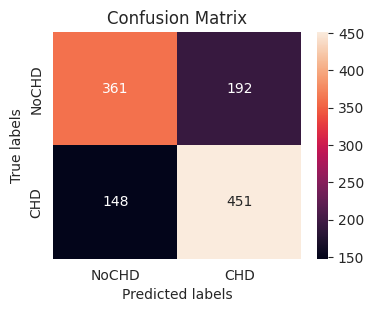

In [350]:
#visulaizing
label= ['NoCHD', 'CHD']
labels = ['361', '192', '148', '451']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_test, test_class_prediction)
#print(cm)
plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()

In [351]:
#confusion matrix on train
svm_cfs_matrics_ = confusion_matrix(y_train,train_class_prediction)
svm_cfs_matrics_

array([[1604,  722],
       [ 483, 1797]])

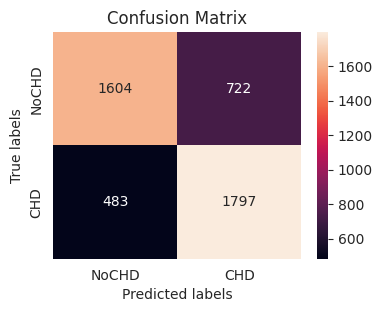

In [352]:
label= ['NoCHD', 'CHD']
labels = ['1604', '722', '483', '1797']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_train, train_class_prediction)
#print(cm)
plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()

In [353]:
print(metrics.classification_report(y_train,train_class_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_prediction))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      2326
           1       0.71      0.79      0.75      2280

    accuracy                           0.74      4606
   macro avg       0.74      0.74      0.74      4606
weighted avg       0.74      0.74      0.74      4606

 
roc_auc_score
0.7388768837398743


In [354]:
print(metrics.classification_report(y_test,test_class_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_prediction))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       553
           1       0.70      0.75      0.73       599

    accuracy                           0.70      1152
   macro avg       0.71      0.70      0.70      1152
weighted avg       0.71      0.70      0.70      1152

 
roc_auc_score
0.7028622146011889



### NEED TO EDIT
The accuracy of the test data is 90.3%, and 100% for training data.

For **Train Data**:-
The precision is 100%, recall is 100%, f1-score is 100% for **NoCHD** or **0**. And the precision is 100%, recall is 100%, f1-score is 100% for **CHD** or **1**. The roc_auc_score is 100%.

For **Test Data**:-
The precision is 89%, recall is 91%, f1-score is 90% for **NoCHD** or **0**. And the precision is 91%, recall is 90%, f1-score is 91% for **CHD** or **1**. The roc_auc_score is 90.3%.

### ML Model - 4 - **KNN Classifier**

In [399]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

In [400]:
#Creating KNN classifier
KNN_clf = KNeighborsClassifier(n_neighbors=5)
# Fit the k-nearest neighbors model on the training data
KNN_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [401]:
#getting prediction
train_knn_prediction = KNN_clf.predict(X_train)
test_knn_prediction = KNN_clf.predict(X_test)

In [402]:
#getting accuracy
train_accuracy_knn = accuracy_score(train_knn_prediction, y_train)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

In [403]:
print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.8623534520191055
The accuracy on test data is  0.8246527777777778


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [404]:
knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[367, 186],
       [ 16, 583]])

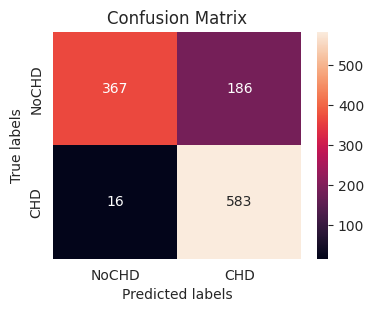

In [405]:
label= ['NoCHD', 'CHD']
labels = ['367', '186', '16', '583']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_test, test_knn_prediction)
#print(cm)
plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()

In [406]:
print(metrics.classification_report(y_train, train_knn_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_knn_prediction))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84      2326
           1       0.79      0.99      0.88      2280

    accuracy                           0.86      4606
   macro avg       0.89      0.86      0.86      4606
weighted avg       0.89      0.86      0.86      4606

 
roc_auc_score
0.8636234556727157


In [407]:
print(metrics.classification_report(y_test, test_knn_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_knn_prediction))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78       553
           1       0.76      0.97      0.85       599

    accuracy                           0.82      1152
   macro avg       0.86      0.82      0.82      1152
weighted avg       0.85      0.82      0.82      1152

 
roc_auc_score
0.8184708087922307


#### 2. Cross- Validation & Hyperparameter Tuning

In [408]:
#Creating KNN classifier.

KNN_clf_hyp = KNeighborsClassifier()

# Using hyperparameter tuning to get the opimal value of n_neighbors

parameters = {'n_neighbors':np.arange(1,10)}
cv_knn_clf = GridSearchCV(KNN_clf_hyp, cv = 5, param_grid = parameters)

# Fitting the model

cv_knn_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [409]:
# Checking the best parameter.

cv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [410]:
# Getting the prediction

train_knn_prediction = cv_knn_clf.predict(X_train)
test_knn_prediction = cv_knn_clf.predict(X_test)

In [411]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_train)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# printing accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.9928354320451585
The accuracy on test data is  0.8923611111111112


In [412]:
# Confusion Matrix

knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[465,  88],
       [ 36, 563]])

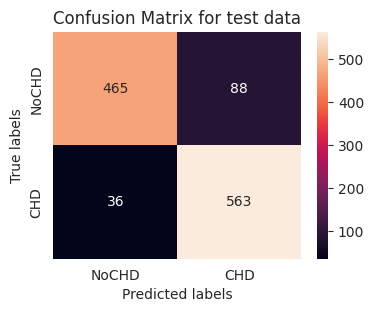

In [413]:
# Plotting the confusion matrix
label= ['NoCHD', 'CHD']
labels = ['465', '88', '36', '563']
labels = np.asarray(labels).reshape(2,2)
cm = confusion_matrix(y_test, test_knn_prediction)
#print(cm)
plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()


In [414]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,test_knn_prediction)

0.8903839129109093

In [415]:
print(metrics.classification_report(y_train, train_knn_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_knn_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2326
           1       1.00      0.99      0.99      2280

    accuracy                           0.99      4606
   macro avg       0.99      0.99      0.99      4606
weighted avg       0.99      0.99      0.99      4606

 
roc_auc_score
0.9927631578947369


In [416]:
print(metrics.classification_report(y_test, test_knn_prediction))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_knn_prediction))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       553
           1       0.86      0.94      0.90       599

    accuracy                           0.89      1152
   macro avg       0.90      0.89      0.89      1152
weighted avg       0.90      0.89      0.89      1152

 
roc_auc_score
0.8903839129109093


##### Which hyperparameter optimization technique have you used and why?

We have two options (i.e. GridSearchCV and RandomizedSeachCV) to tune hyperparameter.

Hence, we know that GridSearchCV checks all combinations of hyperparameters before giving the optimum values of hyperparameters. And it takes lot of space and time to process the data and give optimum result. So, it is an appropriate technique of cross-validation for the small datasets.

Whereas, the RandomizedSeachCV doesn't check for each combinations of hyperparameters, and it is best for large datasets.

Hence, our dataset contains few thousands of observations so, we used the GridSearchCV to get the best result.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Again we did not seen much improovement in our model

### ML Model - 5 - **Decision tree Classifier**

In [417]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier


In [418]:
# Creating model object for DecisionTreeClassifier.
dtree_clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [419]:

dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [420]:
# Making predictions on train and test data
train_class_dtpreds = dtree_clf.predict(X_train)
test_class_dtpreds = dtree_clf.predict(X_test)

In [421]:
roc_auc_score(y_test,test_class_dtpreds)

0.6580663372045632

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [422]:
#confusion matrix on train
cm_matrics_train = confusion_matrix(y_train,train_class_dtpreds)
cm_matrics_train

array([[1582,  744],
       [ 691, 1589]])

In [423]:
#confusion matrix on test
cm_matrics_test = confusion_matrix(y_test,test_class_dtpreds)
cm_matrics_test

array([[353, 200],
       [193, 406]])

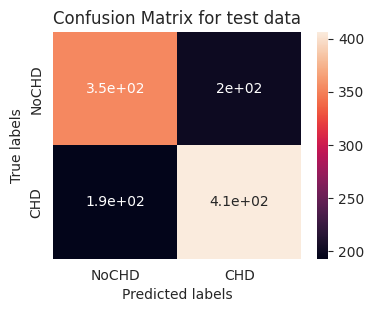

In [424]:
# Plotting the confusion matrix
label= ['NoCHD', 'CHD']

cm = confusion_matrix(y_test, test_class_dtpreds)
#print(cm)
plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test data')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)
plt.show()


####  Cross- Validation & Hyperparameter Tuning

In [425]:
# Creating model object for DecisionTreeClassifier.
dt_cclf = DecisionTreeClassifier()
# Storing the hyperparameters
parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

# Applying GridSearchCV
dt_cclf = GridSearchCV(dt_cclf, parameters, scoring='roc_auc', cv=5)

# Fitting the model
dt_cclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [426]:
# best parameters
dt_cclf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30)

In [427]:
# Getting the predicted classes

train_dtc_prediction = dt_cclf.predict(X_train)
test_dtc_prediction = dt_cclf.predict(X_test)

In [428]:
 #Getting the accuracy scores

train_accuracy_dtc = accuracy_score(train_dtc_prediction, y_train)
test_accuracy_dtc = accuracy_score(test_dtc_prediction, y_test)

# printing op
print("The accuracy of train data is ", train_accuracy_dtc)
print("The accuracy of test data is ", test_accuracy_dtc)


The accuracy of train data is  0.8067737733391229
The accuracy of test data is  0.7439236111111112


In [429]:
# Confusion Matrix

dtc_clf_matrix = confusion_matrix(y_test,test_dtc_prediction)
dtc_clf_matrix

array([[387, 166],
       [129, 470]])

In [430]:
print(metrics.classification_report(y_test,test_dtc_prediction))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       553
           1       0.74      0.78      0.76       599

    accuracy                           0.74      1152
   macro avg       0.74      0.74      0.74      1152
weighted avg       0.74      0.74      0.74      1152



##### Which hyperparameter optimization technique have you used and why?

We have two options (i.e. GridSearchCV and RandomizedSeachCV) to tune hyperparameter.

Hence, we know that GridSearchCV checks all combinations of hyperparameters before giving the optimum values of hyperparameters. And it takes lot of space and time to process the data and give optimum result. So, it is an appropriate technique of cross-validation for the small datasets.

Whereas, the RandomizedSeachCV doesn't check for each combinations of hyperparameters, and it is best for large datasets.

Hence, our dataset contains few thousands of observations so, we used the GridSearchCV to get the best result.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we see much improvement in our model after applying GridSearchCV

### ML Model - 6 - **XgBoost Classifier**

In [431]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [  24 2256]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

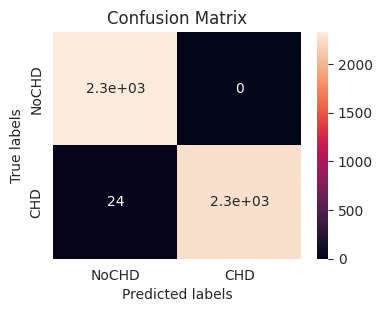

In [432]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[510  43]
 [ 90 509]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

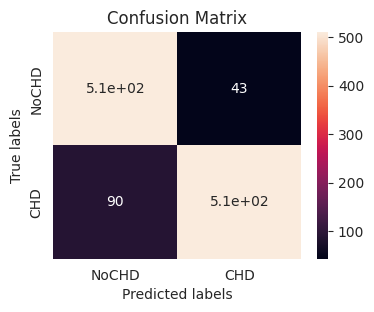

In [433]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)
plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [434]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2326
           1       1.00      0.99      0.99      2280

    accuracy                           0.99      4606
   macro avg       0.99      0.99      0.99      4606
weighted avg       0.99      0.99      0.99      4606

 
roc_auc_score
0.9947368421052631


In [435]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       553
           1       0.92      0.85      0.88       599

    accuracy                           0.88      1152
   macro avg       0.89      0.89      0.88      1152
weighted avg       0.89      0.88      0.88      1152

 
roc_auc_score
0.8859959486425538


#### 2. Cross- Validation & Hyperparameter Tuning

In [436]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[09:16:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[09:16:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[09:16:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[09:16:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[09:16:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [437]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.950782 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}


[[2326    0]
 [   1 2279]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

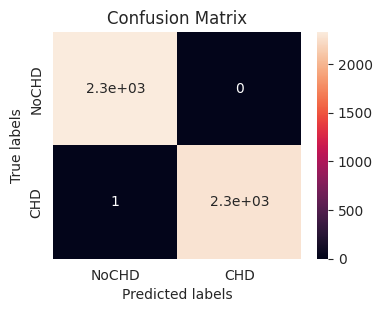

In [438]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[510  43]
 [ 86 513]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

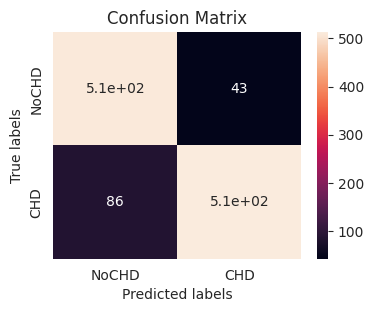

In [439]:
# Get the confusion matrix for both train and test

labels =['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

plt.figure(figsize=(4,3))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [440]:
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

 
roc_auc_score
0.999780701754386


In [441]:
print(metrics.classification_report( y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       553
           1       0.92      0.86      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152

 
roc_auc_score
0.8893348468061598


##### Which hyperparameter optimization technique have you used and why?

We have two options (i.e. GridSearchCV and RandomizedSeachCV) to tune hyperparameter.

Hence, we know that GridSearchCV checks all combinations of hyperparameters before giving the optimum values of hyperparameters. And it takes lot of space and time to process the data and give optimum result. So, it is an appropriate technique of cross-validation for the small datasets.

Whereas, the RandomizedSeachCV doesn't check for each combinations of hyperparameters, and it is best for large datasets.

Hence, our dataset contains few thousands of observations so, we used the GridSearchCV to get the best result.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after using HyperParameter, our model has improved significantly. our accuracy is improved 83% to 88% on our test data

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [442]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [443]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***